# Investigation of initial sample data (sample1)

In [3]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\KESJ\\Documents\\projects\\AutoEstimatics\\InitialDataSurvey'

In [4]:
os.chdir('../sample1/')
infile = 'ReducedColumnInfo.xlsx'
xl_file = pd.ExcelFile(infile)

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
print dfs.keys()

[u'LBR_OPRTN_CD', u'Column Names', u'Point of impact (POI)', u'LOS_EST Data', u'PART_TYPE_CD', u'LBR_TYPE_CD', u'DETL Data']


In [5]:
losest = dfs['LOS_EST Data']
detail = dfs['DETL Data']

### convert column names to lowercase and remove initial space

In [6]:
#change column names to lowercase and remove initial whitespace
losest.columns = [x.strip().lower() for x in losest.columns]
detail.columns = [x.strip().lower() for x in detail.columns]

In [7]:
losest.los_est_dim_id.max(), losest.los_est_dim_id.min(),len(detail)

(70463577.0, 69335209.0, 126709)

In [6]:
losest.veh_model_nm, losest.veh_yr_num

(0     TAURUS SES
1      TAURUS SE
2      TAURUS SE
3     TAURUS SES
4      TAURUS SE
5      TAURUS SE
6      TAURUS SE
7      TAURUS SE
8      TAURUS SE
9      TAURUS SE
10    TAURUS SES
11    TAURUS SES
12    TAURUS SES
13     TAURUS SE
14    TAURUS SES
...
3842       TAURUS SES
3843        TAURUS SE
3844    TAURUS SE SVG
3845       TAURUS SEL
3846        TAURUS SE
3847       TAURUS SES
3848       TAURUS SES
3849        TAURUS SE
3850       TAURUS SES
3851       TAURUS SES
3852       TAURUS SES
3853       TAURUS SES
3854        TAURUS SE
3855        TAURUS SE
3856        TAURUS SE
Name: veh_model_nm, Length: 3857, dtype: object,
 0     2001
1     2003
2     2003
3     2000
4     2000
5     2007
6     2007
7     2001
8     2002
9     2002
10    2003
11    2003
12    2001
13    2001
14    2004
...
3842    2003
3843    2005
3844    2000
3845    2001
3846    2000
3847    2001
3848    2001
3849    2006
3850    2003
3851    2003
3852    2003
3853    2003
3854    2007
3855    2002
3856    2

In [7]:
# some summary info
print len(detail.columns), len(losest.columns)
print detail.columns
print len(detail), len(losest)

14 19
Index([lbr_oprtn_cd, prt_type_cd, lbr_type_cd, line_adjst_pct, prt_clas_cd, prt_qty_cnt, price_amt, dbase_price_amt, paint_hr_cnt, paint_hr_dbase_cnt, lbr_hr_cnt, lbr_hr_dbase_cnt, los_est_busn_id, los_est_dim_id], dtype=object)
126709 3857


In [8]:
# check the data types
nrow = float(len(detail))
print 'table  column   type \t Arity \t Sparsity'
for a in detail.columns:
    print 'detail', a, type(detail.ix[0][a]), len(detail[a].unique()),len(detail[~detail[a].isnull()][a])/nrow

table  column   type 	 Arity 	 Sparsity
detail lbr_oprtn_cd <type 'unicode'> 12 0.714392821347
detail prt_type_cd <type 'unicode'> 8 0.431539985321
detail lbr_type_cd <type 'unicode'> 16 0.804986228287
detail line_adjst_pct <type 'numpy.float64'> 23 1.0
detail prt_clas_cd <type 'unicode'> 806 0.771444806604
detail prt_qty_cnt <type 'numpy.float64'> 23 1.0
detail price_amt <type 'numpy.float64'> 2028 1.0
detail dbase_price_amt <type 'numpy.float64'> 992 1.0
detail paint_hr_cnt <type 'numpy.float64'> 63 1.0
detail paint_hr_dbase_cnt <type 'numpy.float64'> 43 1.0
detail lbr_hr_cnt <type 'numpy.float64'> 107 1.0
detail lbr_hr_dbase_cnt <type 'numpy.float64'> 86 1.0
detail los_est_busn_id <type 'numpy.float64'> 2220 1.0
detail los_est_dim_id <type 'numpy.float64'> 3857 1.0


In [9]:
detail.dtypes

lbr_oprtn_cd           object
prt_type_cd            object
lbr_type_cd            object
line_adjst_pct        float64
prt_clas_cd            object
prt_qty_cnt           float64
price_amt             float64
dbase_price_amt       float64
paint_hr_cnt          float64
paint_hr_dbase_cnt    float64
lbr_hr_cnt            float64
lbr_hr_dbase_cnt      float64
los_est_busn_id       float64
los_est_dim_id        float64
dtype: object

In [1]:
#function to deal with how Excel stores the prt_clas_cd numbers 
def convertParts(prt):
    prt = str(prt)
    aa = prt.split('e+')
    if len(aa) == 2:
        dd = int(float(aa[0])*10.0 ** float(aa[1]))
    else:
        bb = prt.split('.')
        if len(bb) == 2:
            dd = int(bb[0])
        elif 'None' in bb[0]:
            dd = ''
        else:
            dd = prt
    
    return str(dd)

In [2]:
#Convert the part codes to strings
detail['prt_clas_cd'] = detail['prt_clas_cd'].map(lambda x: convertParts(x))
#detail['prt_clas_cd']

NameError: name 'detail' is not defined

### Collapse the four code (object) columns: (lbr_type_cd, lbr_oprtn_cd, prt_type_cd, prt_clas_cd) into lists for each los_est_dim_id

In [12]:
dd = detail[['los_est_dim_id','lbr_type_cd','lbr_oprtn_cd','prt_type_cd','prt_clas_cd']]
#print dd.head(10)
ddd = dd.replace(None, '')
#print ddd.head(10)
grp_detail1 = ddd.groupby('los_est_dim_id').agg(lambda x: " ".join(x.tolist()))

### Explore the nature of the float columns. 

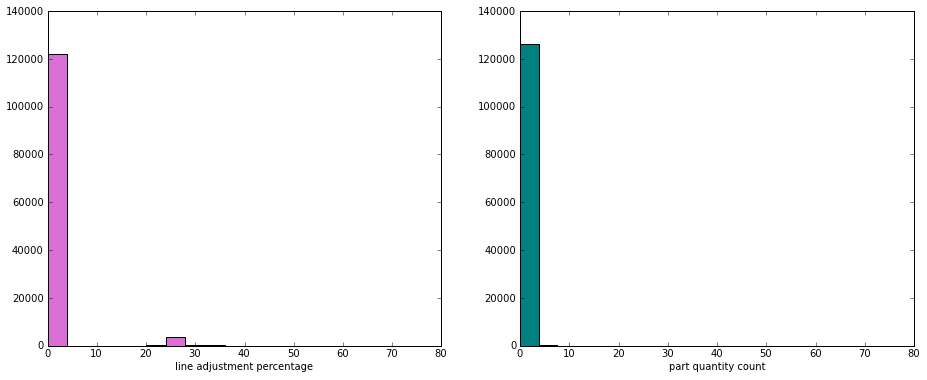

In [13]:
#display hist of percentages and counts
figure(figsize(24,6))
subplot(1,3,1)
hist(detail['line_adjst_pct'],bins=20,color='orchid')
xlabel('line adjustment percentage')
subplot(1,3,2)
hist(detail['prt_qty_cnt'],bins=20,color='teal')
xlabel('part quantity count')

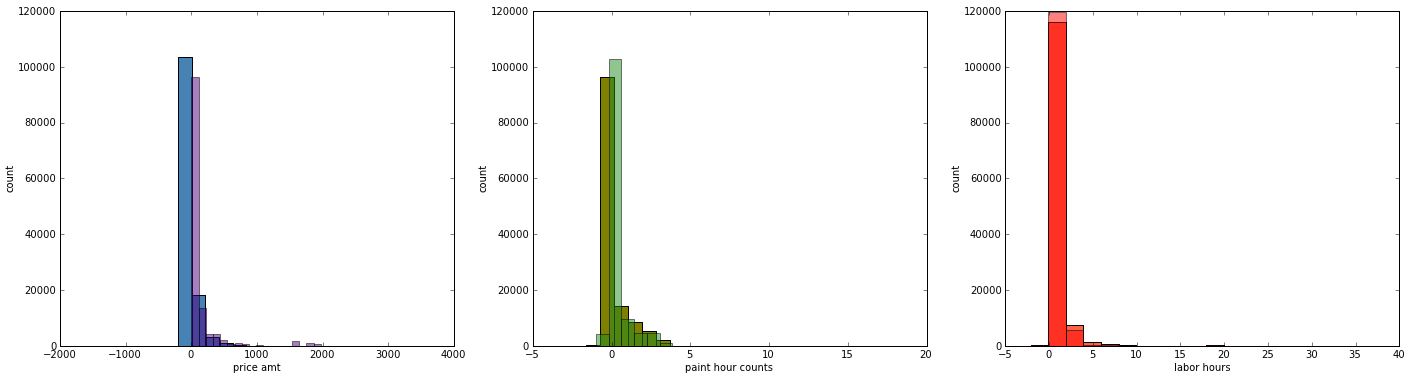

In [14]:
figure(figsize(24,6))
subplot(1,3,1)
hist(detail['price_amt'],bins=20,color='steelblue')
hist(detail['dbase_price_amt'],bins=20,color='indigo',alpha=0.5)
xlabel('price amt')
ylabel('count')
subplot(1,3,2)
hist(detail['paint_hr_cnt'],bins=20,color='olive')
hist(detail['paint_hr_dbase_cnt'],bins=20,color='forestgreen',alpha=0.5)
xlabel('paint hour counts')
ylabel('count')

subplot(1,3,3)
hist(detail['lbr_hr_cnt'],bins=20,color='tomato')
hist(detail['lbr_hr_dbase_cnt'],bins=20,color='red',alpha=0.5)
xlabel('labor hours')
ylabel('count')

<p>Looking at these histograms (the lighter colors are dbase estimate values; while the dark colors are actual values), suggests I should look at the sums only. </p>

### Collapse these columns to sums, grouped by los_est_dim_id

In [15]:
# This returns the sums for the price/hour/qty/count columns
dd = detail.groupby('los_est_dim_id').sum()
dd = dd.drop('los_est_busn_id',1)
#This keeps the los_est_busn_id 
#f = {'los_est_busn_id' : pd.DataFrame.first()}#, 'lines': count}
da = detail.groupby('los_est_dim_id')['los_est_busn_id'].first()
db =detail.groupby('los_est_dim_id')['los_est_busn_id'].count()
#ddd = detail['los_est_busn_id'].groupby('los_est_dim_id').first()#agg({'los_est_busn_id': first(), 'lines': count()})
dc = pd.concat([da,db],axis=1,keys=['los_est_busn_id','lines'])#,names=['los_est_dim_id'])

## Join the data together

Join the different grouped values

In [16]:
print len(dc), len(grp_detail1), len(losest),len(dd)
print shape(losest), shape(grp_detail1), shape(dd), shape(dc)
grp_detail = pd.concat([dc,dd,grp_detail1],1)
print len(grp_detail), shape(grp_detail)
# add a column with the los_est_dim_id into this dataframe:
grp_detail['ledi'] = grp_detail.index

3857 3857 3857 3857
(3857, 19) (3857, 4) (3857, 8) (3857, 2)
3857 (3857, 14)


In [17]:
grp_detail.columns

Index([los_est_busn_id, lines, line_adjst_pct, prt_qty_cnt, price_amt, dbase_price_amt, paint_hr_cnt, paint_hr_dbase_cnt, lbr_hr_cnt, lbr_hr_dbase_cnt, lbr_type_cd, lbr_oprtn_cd, prt_type_cd, prt_clas_cd, ledi], dtype=object)

### Merge with los_estimate data

In [18]:
estimate = pd.merge(losest,grp_detail, left_on='los_est_dim_id',right_on='ledi',how='left')
#drop the ledi and los_est_busn_id_y columns. They are redundant
estimate = estimate.drop(['ledi','los_est_busn_id_y'],1)

In [19]:
print shape(estimate)
estimate.head()

(3857, 32)


los_est_dim_id veh_drvbl_ind      masked_vin vin_dcode_ind  vin_veh_yr_num  \
0        70192712             N  1FAFP55UX1A204             Y             NaN   
1        69451860             Y  1FAFP58U43A247             Y             NaN   
2        69678506             Y  1FAFP58U43A247             Y             NaN   
3        69508931             Y  1FAFP55U8YG235             Y             NaN   
4        69458926             Y  1FAFP53U2YG254             Y             NaN   

  vin_veh_make_nm vin_veh_model_nm  veh_yr_num veh_make_nm vndr_veh_cd  \
0            FORD       TAURUS SES        2001        FORD     DR2JN00   
1            FORD        TAURUS SE        2003        FORD     DR2JN00   
2            FORD        TAURUS SE        2003        FORD     DR2JN00   
3            FORD       TAURUS SES        2000        FORD     DR2JN00   
4            FORD        TAURUS SE        2000        FORD     DR2JN00   

  veh_model_nm veh_body_style_nm  veh_odo_num veh_licns_st_cd  prmry_poi_cd  \
0   TAURUS SES            4D SED       106965              OH             6   
1    TAURUS SE            4D WGN        93589              MD             9   
2    TAURUS SE            4D WGN        93589              MD             9   
3   TAURUS SES            4D SED        98561              VA            12   
4    TAURUS SE            4D SED        80827              TN             9   

   scdy_poi_cd ttl_los_ind              src_rplc_tstmp  los_est_busn_id_x  \
0          NaN           N  9999-12-31-23.59.59.999999           39762158   
1          NaN           N  2010-04-19-05.55.00.000000           39558785   
2          NaN           N  9999-12-31-23.59.59.999999           39558785   
3          NaN           N  2010-04-23-15.28.00.000000           39973352   
4          NaN           N  9999-12-31-23.59.59.999999           38927607   

   lines  line_adjst_pct  prt_qty_cnt  price_amt  dbase_price_amt  \
0     46             100           12    4069.03          7381.43   
1     17              25            4     711.50          2728.04   
2     19              25            4     711.50          2805.24   
3     14              25            4     428.80           489.16   
4     41               0            6     163.55          6162.60   

   paint_hr_cnt  paint_hr_dbase_cnt  lbr_hr_cnt  lbr_hr_dbase_cnt  \
0          21.8                22.2        61.3              37.1   
1           5.0                 5.0         7.3               5.1   
2           5.0                 5.0         7.7               5.1   
3           3.9                 3.9         3.0               5.4   
4           8.6                10.8        23.6               5.8   

                                         lbr_type_cd  \
0  LAB LA2S LAB  LAB LAR LA2S LAUT LAB LAB LAB LA...   
1   LAB LA2S LAB LAB LAB LAB LAB LAB LAB LAB LAB ...   
2   LAB LA2S LAB LAB LAB LAB LAB LAB LAB LAB LAB ...   
3          LAB  LAB LAB LA2S LAB  LAB  LAB LAB LAB     
4   LAB  LAB  LAB LAB  LAB  LAB LAB  LAB LA2S LAB...   

                                        lbr_oprtn_cd  \
0  OP11 OP6 OP11  OP11 OP6 OP6 OP6 OP12 OP2 OP2 O...   
1   OP11 OP6    OP2 OP2 OP2 OP2 OP2 OP2  OP16 OP1...   
2   OP11 OP6    OP2 OP2 OP2 OP2 OP2 OP2  OP16 OP1...   
3      OP16  OP5 OP11 OP6 OP2  OP2  OP11 OP14 OP11     
4   OP2  OP2  OP15 OP16  OP2  OP2 OP2  OP9 OP6 OP...   

                                         prt_type_cd  \
0  PAL    PAN    PAN PAE PAE PAE PAE      PAE PAE...   
1            PAL     PAE PAE PAE PAE PAE PAE    PAE    
2       PAL     PAE PAE PAE PAE PAE PAE    PAE  PAE    
3                                PAN    PAE  PAL       
4   PAE  PAE  PAE   PAE  PAE PAE  PAE  PAE PAE PA...   

                                         prt_clas_cd  
0  1092181112810000 10921811  1089 10891523268600...  
1  1055 1055117916220000L 10551179    10551179162...  
2  1055 1055117916220000L 10551179    10551179162...  
3   1046 10461811 1046181112810000 10461811  1063...  
4  1092 109218111

## Now explore some features of the grouped estimates

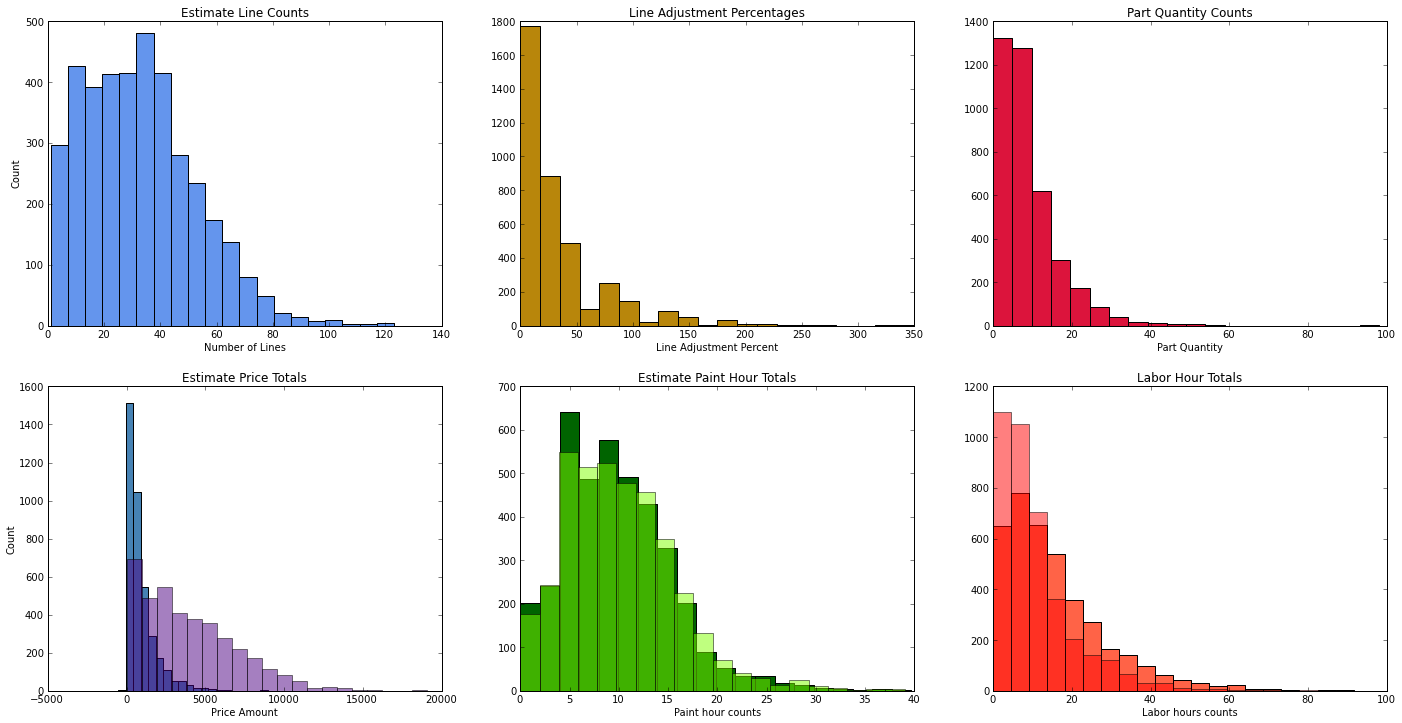

In [20]:
#Histograms of parts
figure(figsize=(24,12))
subplot(2,3,1)
hist(estimate.lines,bins=20,color='cornflowerblue')
xlabel('Number of Lines')
ylabel('Count')
title('Estimate Line Counts')

subplot(2,3,2)
hist(estimate.line_adjst_pct,bins=20,color='darkgoldenrod')
xlabel('Line Adjustment Percent')
title('Line Adjustment Percentages')
subplot(2,3,3)
hist(estimate.prt_qty_cnt,bins=20,color='crimson')
title('Part Quantity Counts')
xlabel('Part Quantity')

subplot(2,3,4)
hist(estimate.price_amt,bins=20,color='steelblue')
hist(estimate['dbase_price_amt'],bins=20,color='indigo',alpha=0.5)
xlabel('Price Amount')
ylabel('Count')
title('Estimate Price Totals')
subplot(2,3,5)
hist(estimate['paint_hr_cnt'],bins=20,color='darkgreen')
hist(estimate['paint_hr_dbase_cnt'],bins=20,color='chartreuse',alpha=0.5)
xlabel('Paint hour counts')
title('Estimate Paint Hour Totals')
#ylabel('count')

subplot(2,3,6)
hist(estimate['lbr_hr_cnt'],bins=20,color='tomato')
hist(estimate['lbr_hr_dbase_cnt'],bins=20,color='red',alpha=0.5)
xlabel('Labor hours counts')
#ylabel('count')
title('Labor Hour Totals')
#savefig('dr2jn00_reduced_Histogram_sums.png',dpi=300)

<p> In the lower 3 plots, light colors indicate database sums, while dark colors are actual sums.</p>

#### Is there a correlation between number of lines and amounts?

In [21]:
lineCvalues = []
c1 = corrcoef(estimate.lines,estimate.price_amt)[0,1]
lineCvalues.append(c1)
c1 = corrcoef(estimate.lines,estimate.paint_hr_cnt)[0,1]
lineCvalues.append(c1)
c1 = corrcoef(estimate.lines,estimate.lbr_hr_cnt)[0,1]
lineCvalues.append(c1)
print lineCvalues

[0.60865774509368775, 0.80810345029983299, 0.77906417681407836]


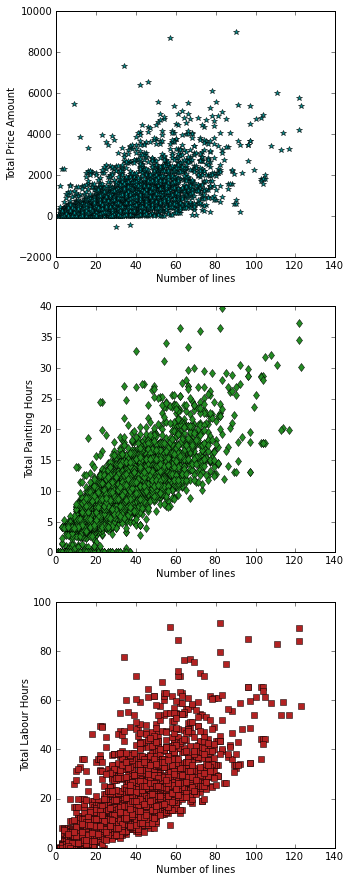

In [22]:
#print corrcoef(estimate.lines,estimate.price_amt)

figure(figsize=(5,15))
subplot(3,1,1)
plot(estimate.lines,estimate.price_amt, '*',color='darkcyan')
xlabel('Number of lines')
ylabel('Total Price Amount')

#text(10,8000,r'$\rho = %5.3f$' % c1[0] )
#text(0.5, 0.5,'matplotlib',
#     horizontalalignment='center',
#     verticalalignment='center')
#ax.annotate('points', xy=(100, 300),  xycoords='figure points')
subplot(3,1,2)
plot(estimate.lines,estimate.paint_hr_cnt, 'd',color='forestgreen')
xlabel('Number of lines')
ylabel('Total Painting Hours')
subplot(3,1,3)
plot(estimate.lines,estimate.lbr_hr_cnt, 's',color='firebrick')
xlabel('Number of lines')
ylabel('Total Labour Hours')

In [23]:
corrcoef(estimate.lbr_hr_cnt, estimate.price_amt)[0][1]

0.63603197309596804

In [24]:
#calculate correlations among numeric columns
columnPearson = estimate.corr()
#remove columns with less meaning --> first 7 
cP = columnPearson.drop(['vin_veh_yr_num','veh_yr_num','los_est_dim_id','los_est_busn_id_x','veh_odo_num','prmry_poi_cd','scdy_poi_cd'], axis=1)
cP = cP[7:]#columnPearson.drop(columnPearson[:7])
#columnPearson.veh_odo_num
cP.as_matrix

<bound method DataFrame.as_matrix of                        lines  line_adjst_pct  prt_qty_cnt  price_amt  \
lines               1.000000        0.507899     0.703785   0.608658   
line_adjst_pct      0.507899        1.000000     0.493119   0.486947   
prt_qty_cnt         0.703785        0.493119     1.000000   0.719685   
price_amt           0.608658        0.486947     0.719685   1.000000   
dbase_price_amt     0.793462        0.371127     0.395244   0.446173   
paint_hr_cnt        0.808103        0.519481     0.544633   0.608756   
paint_hr_dbase_cnt  0.806862        0.496109     0.545912   0.588742   
lbr_hr_cnt          0.779064        0.445182     0.553362   0.636032   
lbr_hr_dbase_cnt    0.721038        0.456096     0.642472   0.775373   

                    dbase_price_amt  paint_hr_cnt  paint_hr_dbase_cnt  \
lines                      0.793462      0.808103            0.806862   
line_adjst_pct             0.371127      0.519481            0.496109   
prt_qty_cnt            

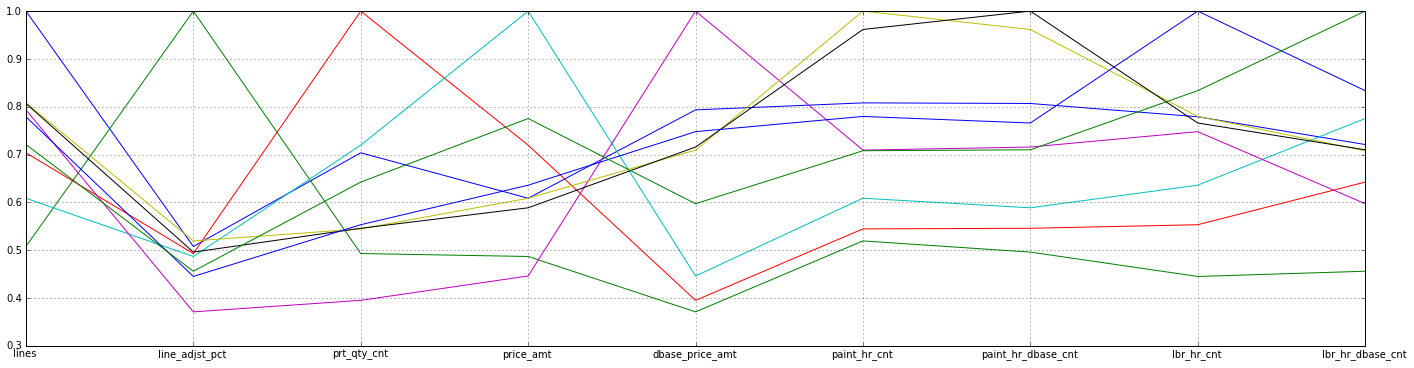

In [25]:
#figure(figsize=(25,10))
#cP.plot(subplots=True,legend=False,x_compat = True)
cP.plot(legend=False,x_compat=True)

Index([lines, line_adjst_pct, prt_qty_cnt, price_amt, dbase_price_amt, paint_hr_cnt, paint_hr_dbase_cnt, lbr_hr_cnt, lbr_hr_dbase_cnt], dtype=object)


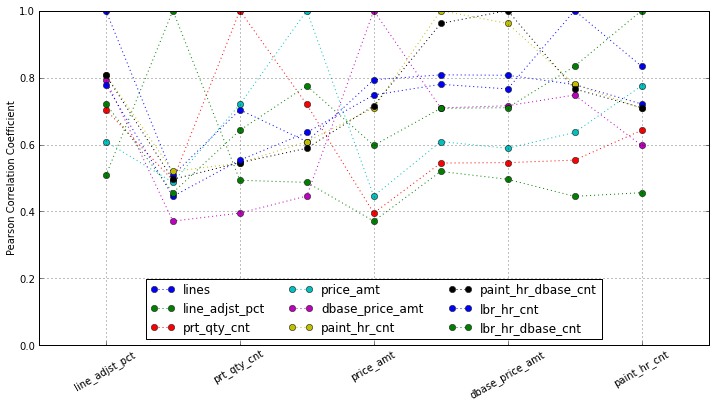

In [26]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
#hold on
indx = np.arange(0,9)
lnames = cP.columns
print lnames
dP = cP.as_matrix
eP = cP.values
#dP.values()#plot(dP)
for i in xrange(0,len(eP)):
    #print i, cP.columns[i], eP[i,:]
    plot(indx, eP[i,:],'o:',label=cP.columns[i])    
    
ax.axis([-1,9,0,1])
ax.set_xticklabels(lnames,rotation=30)

#shrink current axis by 20%
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width*0.8, box.height])

#ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
#ax.legend(bbox_to_anchor=(1.5,1.05))
ax.legend(loc='lower center', ncol=3)
ax.grid(True)
ylabel('Pearson Correlation Coefficient')

In [27]:
estimate.lbr_oprtn_cd.head()

0    OP11 OP6 OP11  OP11 OP6 OP6 OP6 OP12 OP2 OP2 O...
1     OP11 OP6    OP2 OP2 OP2 OP2 OP2 OP2  OP16 OP1...
2     OP11 OP6    OP2 OP2 OP2 OP2 OP2 OP2  OP16 OP1...
3        OP16  OP5 OP11 OP6 OP2  OP2  OP11 OP14 OP11  
4     OP2  OP2  OP15 OP16  OP2  OP2 OP2  OP9 OP6 OP...
Name: lbr_oprtn_cd, dtype: object

## Examine relationships among price_amt and dbase_price_amt

<p> Correlation for summed price amounts (i.e. grouped by estimate) versus when each part is considered
(i.e. within details)</p>
<p> Look at how many lines have both price_amts and db_price amts</P>

0.446173111249
0.278970425191


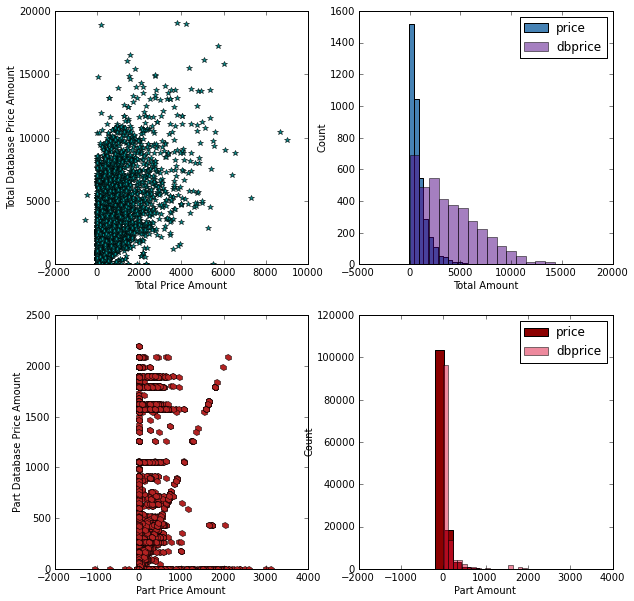

In [30]:
print corrcoef(estimate.price_amt,estimate.dbase_price_amt)[0,1]
print corrcoef(detail.price_amt,detail.dbase_price_amt)[0,1]
figure(figsize=(10,10))
subplot(2,2,1)
plot(estimate.price_amt, estimate.dbase_price_amt, '*',color='darkcyan')
ylabel('Total Database Price Amount')
xlabel('Total Price Amount')
subplot(2,2,2)
hist(estimate.price_amt, bins=20,color='steelblue')
hist(estimate['dbase_price_amt'],bins=20,color='indigo',alpha=0.5)
legend(('price','dbprice'))
xlabel('Total Amount')
ylabel('Count')

subplot(2,2,3)
plot(detail.price_amt, detail.dbase_price_amt, 'h',color='firebrick')
ylabel('Part Database Price Amount')
xlabel('Part Price Amount')
subplot(2,2,4)
hist(detail.price_amt, bins=20,color='darkred')
hist(detail['dbase_price_amt'],bins=20,color='crimson',alpha=0.5)
legend(('price','dbprice'))
xlabel('Part Amount')
ylabel('Count')


In [34]:
print len(detail[detail.price_amt > 0]), len(detail), len(detail[detail.dbase_price_amt > 0])
len(estimate[estimate.price_amt > 0]), len(estimate), len(estimate[estimate.dbase_price_amt > 0])

30477 126709 53840


(3806, 3857, 3819)

(array([    2,     0,     1,     1,     5,     7,    12,    17,    20,
          13,    25,    16,    21,    35,    42,   204,   802, 96093,
       16272,  3850,  3347,  1639,   674,   402,   363,   224,  1380,
         748,   407,    87]),
 array([-3125.        , -2947.79433333, -2770.58866667, -2593.383     ,
       -2416.17733333, -2238.97166667, -2061.766     , -1884.56033333,
       -1707.35466667, -1530.149     , -1352.94333333, -1175.73766667,
        -998.532     ,  -821.32633333,  -644.12066667,  -466.915     ,
        -289.70933333,  -112.50366667,    64.702     ,   241.90766667,
         419.11333333,   596.319     ,   773.52466667,   950.73033333,
        1127.936     ,  1305.14166667,  1482.34733333,  1659.553     ,
        1836.75866667,  2013.96433333,  2191.17      ]),
 <a list of 30 Patch objects>)

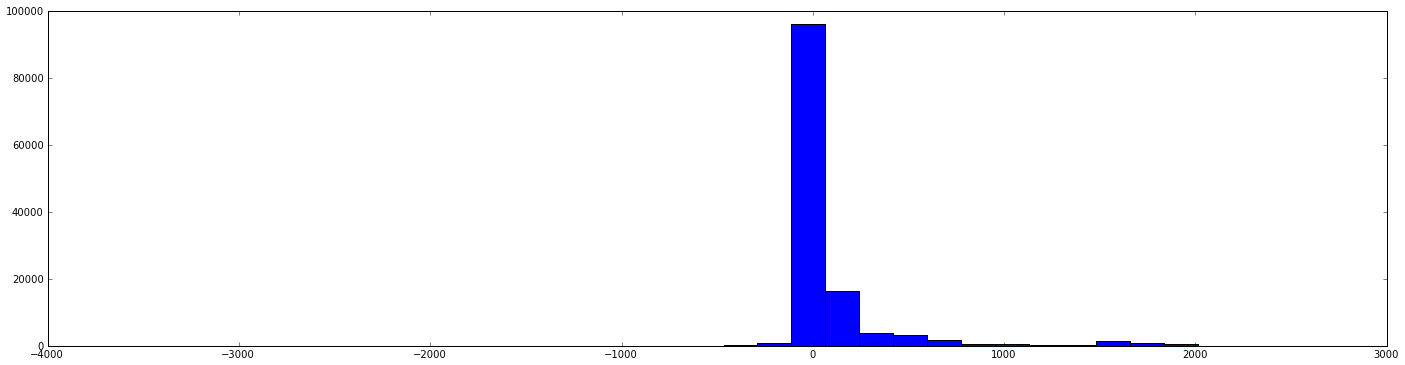

In [39]:
hist(detail.dbase_price_amt-detail.price_amt,bins=30)
#print len(detail[detail.price_amt.isnull()]), len(detail), len(detail[detail.dbase_price_amt > 0])
#len(estimate[estimate.price_amt > 0]), len(estimate), len(estimate[estimate.dbase_price_amt > 0])

<P> which partscodes are associated with nonzero values?<P>

In [43]:
len(detail), len(detail[detail.price_amt != 0]), len(detail[detail.dbase_price_amt != 0])

(126709, 30490, 53840)

0.541934151603


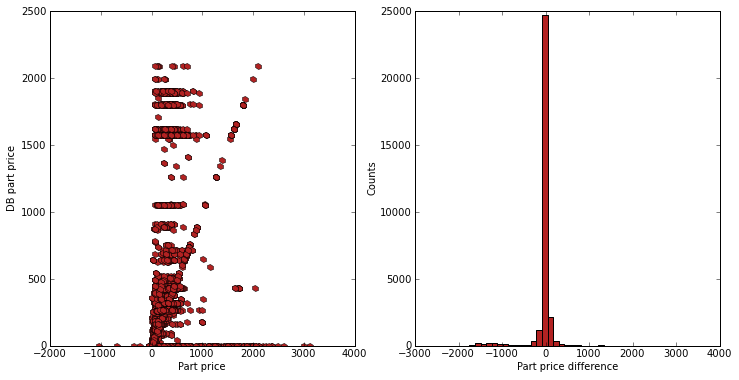

In [51]:
nonzeroPrices = detail[detail.price_amt !=0]
#hist(nonzeroPrices.price_amt, bins=40,color='darkred')
#hist(nonzeroPrices.dbase_price_amt, bins=30,color='crimson',alpha=0.5)
figure(figsize=(12,6))
subplot(1,2,1)
plot(nonzeroPrices.price_amt, nonzeroPrices.dbase_price_amt,'h',color='firebrick')
xlabel('Part price')
ylabel('DB part price')
subplot(1,2,2)
hist(nonzeroPrices.price_amt - nonzeroPrices.dbase_price_amt,bins=40,color='firebrick')
xlabel('Part price difference')
ylabel('Counts')
print corrcoef(nonzeroPrices.price_amt, nonzeroPrices.dbase_price_amt)[0,1]


In [59]:
#part codes that are negative
nonzeroPrices[nonzeroPrices.price_amt < 0][['lbr_type_cd','prt_clas_cd','dbase_price_amt','price_amt']]#['prt_clas_cd'].value_counts()
#nonzeroPrices['prt_clas_cd'].value_counts()

,lbr_type_cd,prt_clas_cd,dbase_price_amt,price_amt
48525,LAB,,0,-27.84
49918,LAB,,0,-343.75
50948,LAB,,0,-234.00
82806,LAB,,0,-1032.88
86570,LAB,,0,-2.50
86655,LAB,,0,-2.50
90900,LAB,,0,-679.00
93146,LAB,,0,-50.00
94457,LAB,,0,-49.15
115664,LAB,,0,-43.53


In [82]:
#list part codes that have positive prices
print nonzeroPrices[nonzeroPrices.price_amt > 0][['lbr_type_cd','prt_clas_cd','dbase_price_amt','price_amt']]#['prt_clas_cd'].value_counts()
print nonzeroPrices[nonzeroPrices.price_amt > 0]['prt_clas_cd'].value_counts()
validPrts = nonzeroPrices[nonzeroPrices.price_amt > 0]['prt_clas_cd'].unique()
#print validPrts
for part in validPrts:
    #if len(part) > 0:
    print len(part), part #convert2partname(part,pDict)
    #print len(part), convert2partname(part,pDict)
    #function to get partname is near bottom of page

 <class 'pandas.core.frame.DataFrame'>
Int64Index: 30477 entries, 0 to 126702
Data columns (total 4 columns):
lbr_type_cd        29321  non-null values
prt_clas_cd        30477  non-null values
dbase_price_amt    30477  non-null values
price_amt          30477  non-null values
dtypes: float64(2), object(2)
                     13090
1046181112810000      1059
1092181112810000       803
1202151633540000       668
1066134820410000       637
1057133319780000R      578
1057133319780000L      555
1063132019200000       463
1040123317400000L      435
1040123317400000R      430
1046181110130000       360
1156180334630000       351
1145122724170000       295
1202151623370000       252
1055117916220000L      241
...
1099172929130000R    1
1073130831410000R    1
1089124129400000     1
1073130831410000L    1
1099168830420025R    1
1099106916460000L    1
1046181112810105L    1
1084138640980000L    1
1031105120339999     1
1001114026260000     1
1032181316640000     1
1073180734860000     1
9002991

66


(array([12, 30,  9,  5,  5,  2,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1]),
 array([  78.03  ,   95.1605,  112.291 ,  129.4215,  146.552 ,  163.6825,
        180.813 ,  197.9435,  215.074 ,  232.2045,  249.335 ,  266.4655,
        283.596 ,  300.7265,  317.857 ,  334.9875,  352.118 ,  369.2485,
        386.379 ,  403.5095,  420.64  ]),
 <a list of 20 Patch objects>)

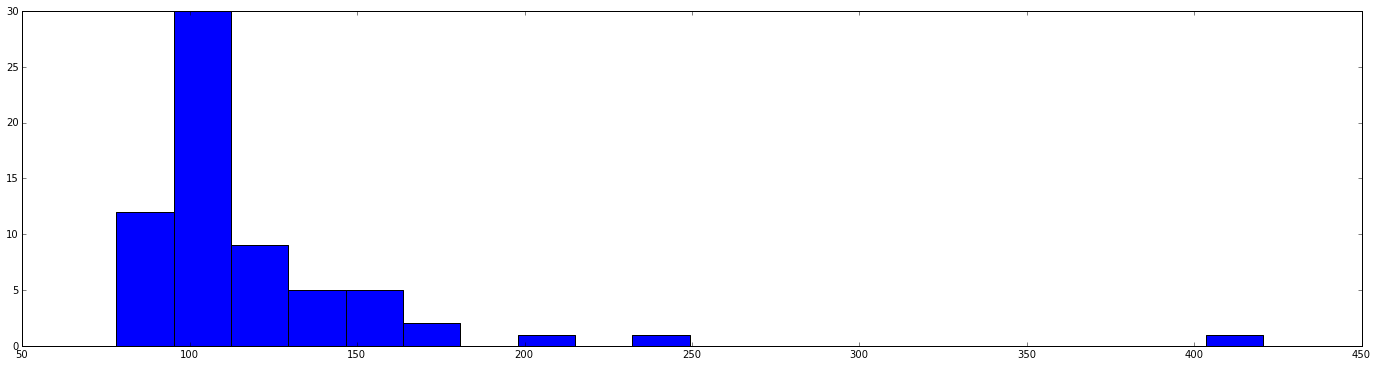

In [96]:
print len(nonzeroPrices[nonzeroPrices.prt_clas_cd=='9005']['price_amt'])
hist(nonzeroPrices[nonzeroPrices.prt_clas_cd=='9005']['price_amt'],bins=20)
#hist(nonzeroPrices[nonzeroPrices.prt_clas_cd=='9005']['dbase_price_amt'],bins=10,color='green',alpha=0.8)

430


(array([  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 295,   0,   0,   0,   0, 130]),
 array([   0.   ,    4.695,    9.39 ,   14.085,   18.78 ,   23.475,
         28.17 ,   32.865,   37.56 ,   42.255,   46.95 ,   51.645,
         56.34 ,   61.035,   65.73 ,   70.425,   75.12 ,   79.815,
         84.51 ,   89.205,   93.9  ,   98.595,  103.29 ,  107.985,
        112.68 ,  117.375,  122.07 ,  126.765,  131.46 ,  136.155,
        140.85 ,  145.545,  150.24 ,  154.935,  159.63 ,  164.325,
        169.02 ,  173.715,  178.41 ,  183.105,  187.8  ]),
 <a list of 40 Patch objects>)

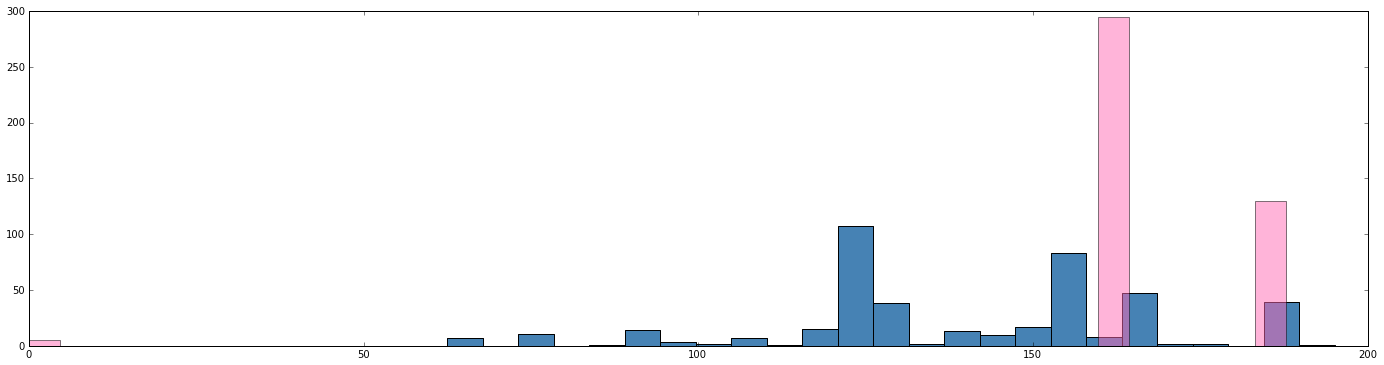

In [102]:
print len(nonzeroPrices[nonzeroPrices.prt_clas_cd=='1040123317400000R']['price_amt'])
hist(nonzeroPrices[nonzeroPrices.prt_clas_cd=='1040123317400000R']['price_amt'],bins=25,color='steelblue')
hist(nonzeroPrices[nonzeroPrices.prt_clas_cd=='1040123317400000R']['dbase_price_amt'],color='hotpink',bins=40,alpha=0.5)

### Histogram of Points of Impact for this set

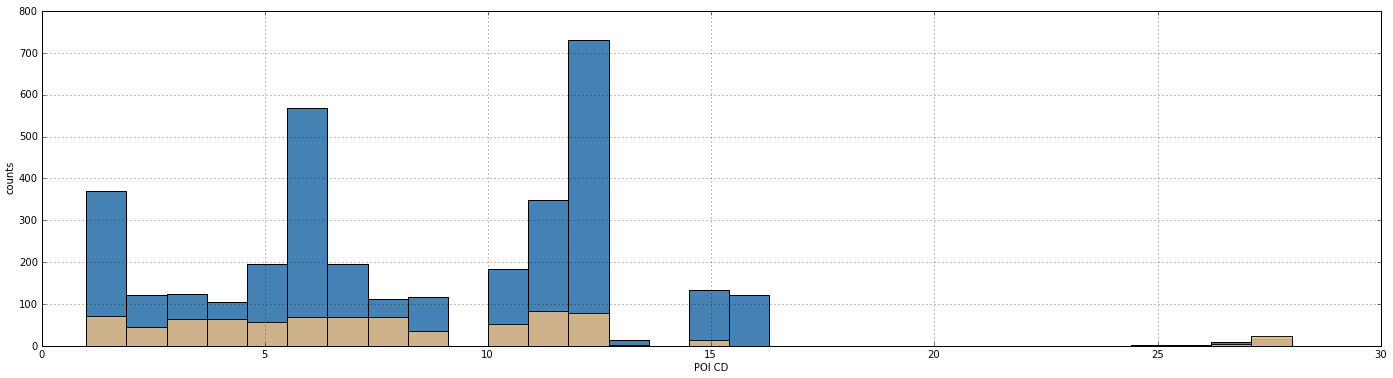

In [28]:
estimate.prmry_poi_cd.hist(bins=30,color='steelblue')
estimate.scdy_poi_cd.hist(bins=30,color='burlywood',alpha=0.9)
xlabel('POI CD') 
ylabel('counts')
savefig('dr2jn00_reduced_Histogram_POI.png',dpi=300)

730 78


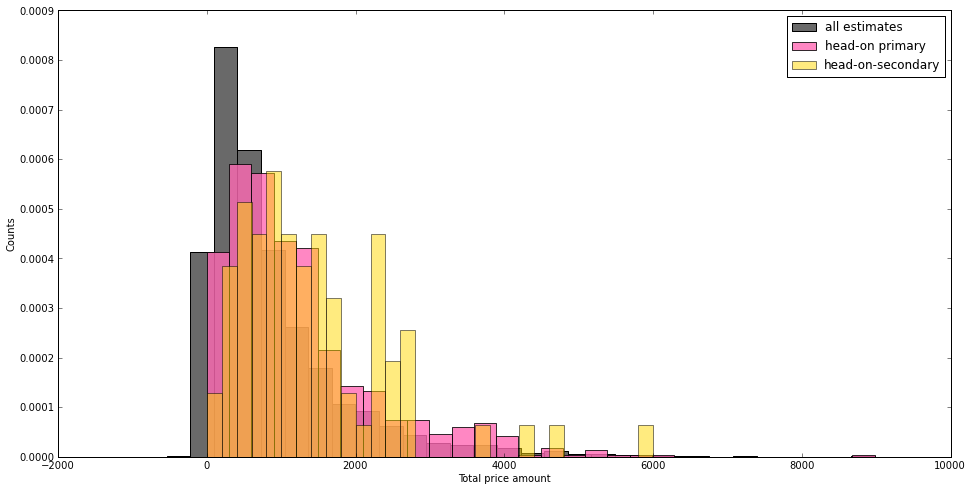

In [29]:
#pull out the subset where prmry_poi_cd == 12 (head on collisions)
primary12 = estimate[estimate.prmry_poi_cd==12]
secondary12 = estimate[estimate.scdy_poi_cd==12]
print len(primary12),len(secondary12)
#p1_ledi = primary1.los_est_dim_id.values
#p1_ledi
figure(figsize(16,8))
hist(estimate.price_amt, bins=30, color='dimGray',normed=1)
hist(primary12.price_amt, bins=30, color='hotpink',normed=1,alpha=0.8)
hist(secondary12.price_amt, bins=30, color='gold',normed=1,alpha=0.5)
legend(['all estimates','head-on primary','head-on-secondary'])
xlabel('Total price amount')
ylabel('Counts')

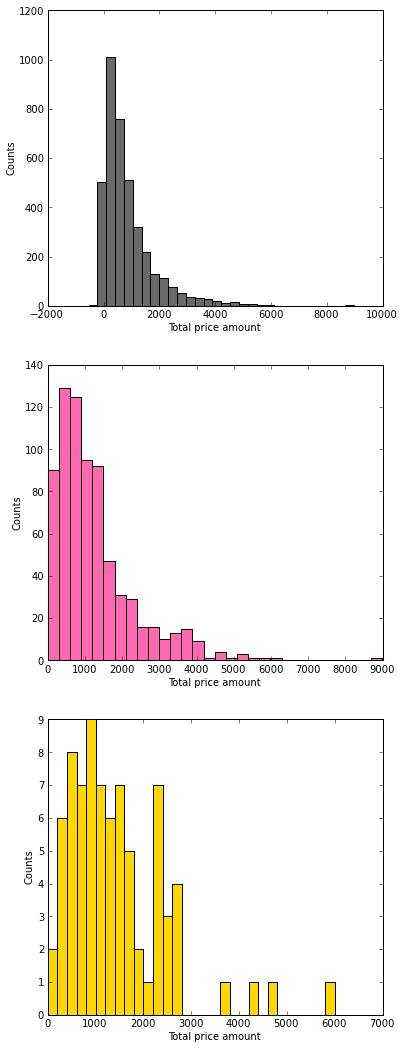

In [30]:
figure(figsize=(6,18))
subplot(3,1,1)
#pull out the subset where prmry_poi_cd == 12 (head on collisions)
#primary12 = estimate[estimate.prmry_poi_cd==12]
#secondary12 = estimate[estimate.scdy_poi_cd==12]

#print len(primary12),len(secondary12)
#p1_ledi = primary1.los_est_dim_id.values
#p1_ledi

hist(estimate.price_amt, bins=30, color='dimGray')#,normed=1)
xlabel('Total price amount')
ylabel('Counts')
subplot(3,1,2)
hist(primary12.price_amt, bins=30, color='hotpink')#,normed=1,alpha=0.8)
xlabel('Total price amount')
ylabel('Counts')
subplot(3,1,3)
hist(secondary12.price_amt, bins=30, color='gold')#,normed=1,alpha=0.5)
#legend(['all estimates','head-on primary','head-on-secondary'])
xlabel('Total price amount')
ylabel('Counts')

In [31]:
#Repeat correlations for head on collisons:
#calculate correlations among numeric columns
cPprime = primary12.corr()
#remove columns with less meaning --> first 7 
cPprime = cPprime.drop(['vin_veh_yr_num','veh_yr_num','los_est_dim_id','los_est_busn_id_x','veh_odo_num','prmry_poi_cd','scdy_poi_cd'], axis=1)
cPprime = cPprime[7:]
cPprime.as_matrix

<bound method DataFrame.as_matrix of                        lines  line_adjst_pct  prt_qty_cnt  price_amt  \
lines               1.000000        0.547078     0.801692   0.743605   
line_adjst_pct      0.547078        1.000000     0.501166   0.426443   
prt_qty_cnt         0.801692        0.501166     1.000000   0.729972   
price_amt           0.743605        0.426443     0.729972   1.000000   
dbase_price_amt     0.841934        0.483122     0.595899   0.701101   
paint_hr_cnt        0.799872        0.465843     0.549290   0.660197   
paint_hr_dbase_cnt  0.806704        0.442994     0.566288   0.635908   
lbr_hr_cnt          0.805246        0.434820     0.599304   0.712705   
lbr_hr_dbase_cnt    0.814328        0.356518     0.682101   0.763731   

                    dbase_price_amt  paint_hr_cnt  paint_hr_dbase_cnt  \
lines                      0.841934      0.799872            0.806704   
line_adjst_pct             0.483122      0.465843            0.442994   
prt_qty_cnt            

In [32]:
cP.lines

lines                 1.000000
line_adjst_pct        0.507899
prt_qty_cnt           0.703785
price_amt             0.608658
dbase_price_amt       0.793462
paint_hr_cnt          0.808103
paint_hr_dbase_cnt    0.806862
lbr_hr_cnt            0.779064
lbr_hr_dbase_cnt      0.721038
Name: lines, dtype: float64

In [33]:
cPprime.lines

lines                 1.000000
line_adjst_pct        0.547078
prt_qty_cnt           0.801692
price_amt             0.743605
dbase_price_amt       0.841934
paint_hr_cnt          0.799872
paint_hr_dbase_cnt    0.806704
lbr_hr_cnt            0.805246
lbr_hr_dbase_cnt      0.814328
Name: lines, dtype: float64

In [34]:
cP.price_amt

lines                 0.608658
line_adjst_pct        0.486947
prt_qty_cnt           0.719685
price_amt             1.000000
dbase_price_amt       0.446173
paint_hr_cnt          0.608756
paint_hr_dbase_cnt    0.588742
lbr_hr_cnt            0.636032
lbr_hr_dbase_cnt      0.775373
Name: price_amt, dtype: float64

In [35]:
cPprime.price_amt

lines                 0.743605
line_adjst_pct        0.426443
prt_qty_cnt           0.729972
price_amt             1.000000
dbase_price_amt       0.701101
paint_hr_cnt          0.660197
paint_hr_dbase_cnt    0.635908
lbr_hr_cnt            0.712705
lbr_hr_dbase_cnt      0.763731
Name: price_amt, dtype: float64

In [36]:
tdiff = cPprime - cP
print tdiff.max()
tdiff.as_matrix

lines                 0.134947
line_adjst_pct        0.111994
prt_qty_cnt           0.200655
price_amt             0.254928
dbase_price_amt       0.254928
paint_hr_cnt          0.086893
paint_hr_dbase_cnt    0.047165
lbr_hr_cnt            0.076673
lbr_hr_dbase_cnt      0.153473
dtype: float64


<bound method DataFrame.as_matrix of                        lines  line_adjst_pct  prt_qty_cnt  price_amt  \
lines               0.000000        0.039179     0.097907   0.134947   
line_adjst_pct      0.039179        0.000000     0.008047  -0.060504   
prt_qty_cnt         0.097907        0.008047     0.000000   0.010286   
price_amt           0.134947       -0.060504     0.010286   0.000000   
dbase_price_amt     0.048472        0.111994     0.200655   0.254928   
paint_hr_cnt       -0.008231       -0.053638     0.004657   0.051441   
paint_hr_dbase_cnt -0.000157       -0.053115     0.020376   0.047165   
lbr_hr_cnt          0.026182       -0.010362     0.045942   0.076673   
lbr_hr_dbase_cnt    0.093291       -0.099577     0.039629  -0.011642   

                    dbase_price_amt  paint_hr_cnt  paint_hr_dbase_cnt  \
lines                      0.048472     -0.008231           -0.000157   
line_adjst_pct             0.111994     -0.053638           -0.053115   
prt_qty_cnt            

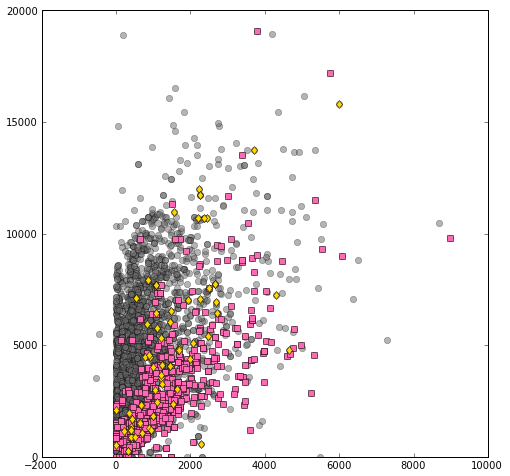

In [37]:
figure(figsize=(8,8))
plot(estimate.price_amt,estimate.dbase_price_amt,'o',color='dimgray', alpha=0.5)
plot(primary12.price_amt,primary12.dbase_price_amt,'s',color='hotpink')
plot(secondary12.price_amt,secondary12.dbase_price_amt,'d',color='gold')

#### Split Correlations by POI groupings

In [38]:
poiGrp = estimate.groupby('prmry_poi_cd')
print len(poiGrp)
kgrps = 0
grp_correlations = []
grpDict ={}
for gindex, g in poiGrp:
    dp = g.corr()
    #remove columns with less meaning --> first 7 
    dp = dp.drop(['vin_veh_yr_num','veh_yr_num','los_est_dim_id','los_est_busn_id_x','veh_odo_num','prmry_poi_cd','scdy_poi_cd'], axis=1)
    dp = dp[7:]
    grp_correlations.append(dp)
    grpDict[kgrps] = gindex
    kgrps+=1
    #print gindex, g.prmry_poi_cd.head(1)

19


In [39]:
grpDict[18]

28.0

In [40]:
grpDict[12]

13.0

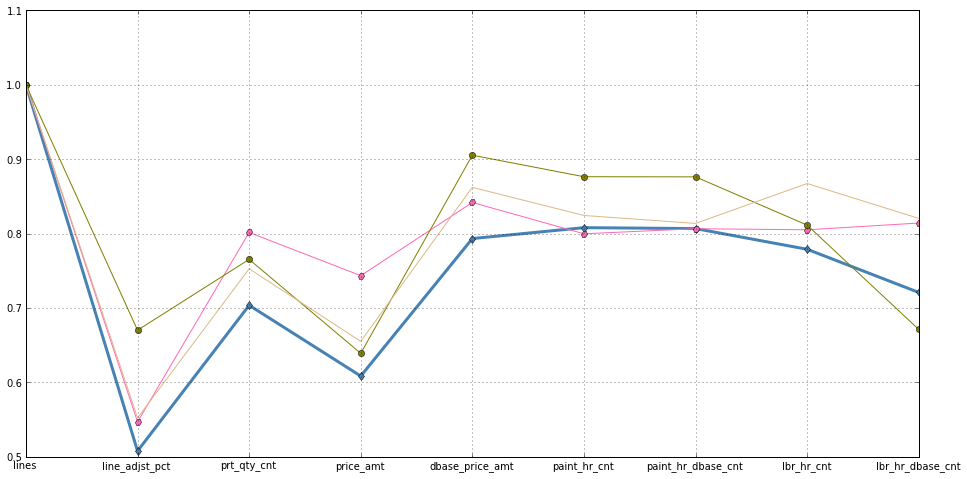

In [41]:
cP.lines.plot(marker='d',color='steelblue',lw=3)
grp_correlations[11].lines.plot(marker='H',color='hotpink')
grp_correlations[5].lines.plot(marker='o',color='olive')
grp_correlations[0].lines.plot(':',color='burlywood')


In [42]:
#detail.groupby(['los_est_dim_id'])['line_adjst_pct'].agg({'sum': np.sum, 'mean' : np.mean, 'variance' : np.var})[:10]

## Look at Items in each estimate

In [43]:
estimate.prt_clas_cd

0     1092181112810000 10921811  1089 10891523268600...
1     1055 1055117916220000L 10551179    10551179162...
2     1055 1055117916220000L 10551179    10551179162...
3      1046 10461811 1046181112810000 10461811  1063...
4     1092 1092181112810000 1096 1096174031740000L 1...
5     1092 1092181112810000 10921811 1096 1096174031...
6     1092 10921811 1092181112810000 10921811 109218...
7     1046 1046181112810000 1057 1057133319780000R 1...
8     1055122712440000R 1055122712440000R 10551227 1...
9     1092 1092181112810000 1096 1096174031740000R 1...
10    1040 1040123317400000L 10401233 10401233 10401...
11    1040 1040123317400000L 10401233 10401233 10401...
12    10661348  1066134821339999 1040 10401233174000...
13    1092 1092181112810000 10921811 109218111281016...
14      1046 1046181112810000 1057 1057133319780000L...
...
3842             1046 10461811 1046181112810000 104618...
3843        1046 10461811 1046181112810000 10461811 10...
3844    9002 9002990497220001 90029904  

<h1> Begin Apriori analysis</h1>
<p> Steps
    <ol> 
        <li> push to dataset</li>
        <li> create list of candidate items sets as dictionary</li>
</o1></p>


### 1. Set up part codes as a transaction list

In [44]:
# convert prt_clas_cd to transactions
pdataset = estimate.prt_clas_cd.map(lambda x: x.split(' ')).values.tolist()
#remove blanks
part_code_dataset =[]
for a in pdataset:
    str_list = [x for x in a if x != '']
    part_code_dataset.append(frozenset(str_list))


In [45]:
#calculate for head-on primary collisions
p12dataset = primary12.prt_clas_cd.map(lambda x: x.split(' ')).values.tolist()

#remove blanks
p12_part_code_dataset =[]
for a in p12dataset:
    str_list = [x for x in a if x != '']
    p12_part_code_dataset.append(frozenset(str_list))

### 2. Define required Apriori functions

In [46]:
def scanD(dataset, candidates, min_support):
    "Returns all candidates that meets a minimum support level"
    sscnt = {}
    for tid in dataset:
        for can in candidates:
            if can.issubset(tid):
                sscnt.setdefault(can, 0)
                sscnt[can] += 1
 
    num_items = float(len(dataset))
    retlist = []
    support_data = {}
    for key in sscnt:
        support = sscnt[key] / num_items
        if support >= min_support:
            retlist.insert(0, key)
        support_data[key] = support
    return retlist, support_data

def createC1(dataset):
    "Create a list of candidate item sets of size one."
    c1 = []
    for transaction in dataset:
        for item in transaction:
            if not [item] in c1:
                c1.append([item])
    c1.sort()
    #frozenset because it will be a key of a dictionary.
    return map(frozenset, c1)

In [47]:
def aprioriGen(freq_sets, k):
    "Generate the joint transactions from candidate sets"
    retList = []
    lenLk = len(freq_sets)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):
            L1 = list(freq_sets[i])[:k - 2]
            L2 = list(freq_sets[j])[:k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:
                retList.append(freq_sets[i] | freq_sets[j])
    return retList

def apriori(dataset, minsupport=0.5,k=2):
    "Generate a list of candidate item sets"
    C1 = createC1(dataset)
    D = map(set, dataset)
    L1, support_data = scanD(D, C1, minsupport)
    L = [L1]
    k = 2
    while (len(L[k - 2]) > 0):
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = scanD(D, Ck, minsupport)
        support_data.update(supK)
        L.append(Lk)
        k += 1
 
    return L, support_data

In [48]:
#return part cd corresponding to support over smin
def getCodes(myCodes,smin=0.1):
    keys = [x for x,y in myCodes.items() if y >= smin]
    return(keys)

### 3. Apply Apriori to whole parts list

In [49]:
# List all possible parts:
allParts = createC1(part_code_dataset)
len(allParts)

781

### 4. Generate list of parts with minimum support of 0.1

In [50]:
#generate list of parts with minimum support of 0.1
pList, pList_supp = scanD(part_code_dataset,allParts,0.1)

0.00025926886181 0.506611355976 781


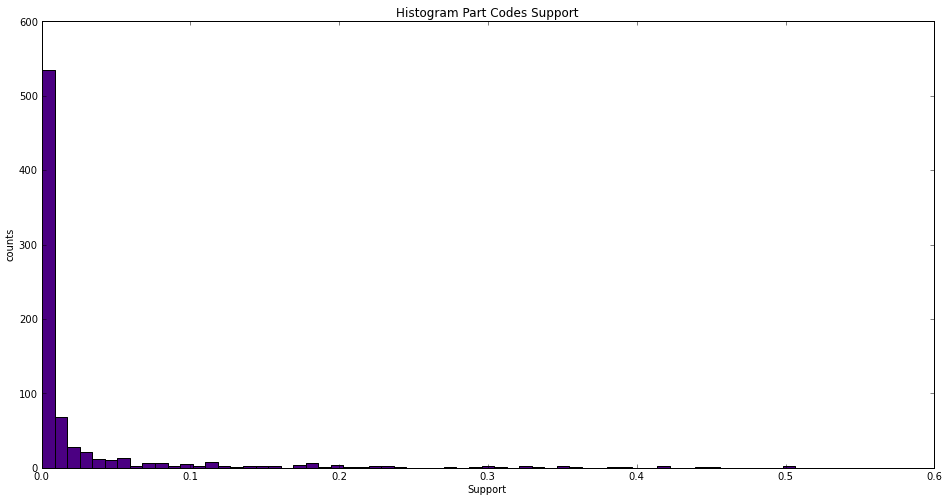

In [51]:
#plot a histogram of part_code_list support
suppV = pList_supp.values()
print min(suppV), max(suppV), len(suppV)
#(max(suppV) -min(suppV))
hist(suppV, bins=60, color='indigo')
xlabel('Support')
ylabel('counts')
title('Histogram Part Codes Support')

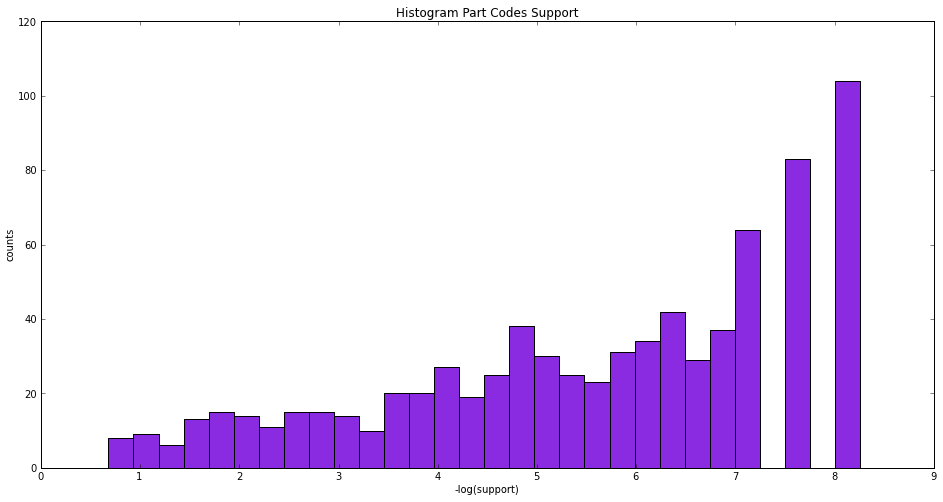

In [52]:
# repeat plotting log(support)
hist(-1.*log(suppV),bins=30,color='blueviolet')
xlabel('-log(support)')
ylabel('counts')
title('Histogram Part Codes Support')

In [53]:
ntrans = len(part_code_dataset)
    
logSupp=np.zeros((ntrans,2))
#for i in part_code_dataset:
k=0
for i in part_code_dataset:
    nsum = 0.0
    nitems = 0.0
    for x in i:
        nitems+=1.0
        nsum-=log(pList_supp[frozenset({x})])
        
    logSupp[k,0] = nsum
    logSupp[k,1] = nitems
    k=k+1


<h3> For each transaction, $i$, define the surprise as $\Sigma_k -\ln(Support)_k$ and Novelty as $\langle $ Surprise $\rangle$<h3>

In [54]:
#Define surprise and novelty of a transaction
def surprise(dataset,setSupport):
    ntrans = len(dataset)
    Surprise = np.zeros((ntrans,2))
    k=0
    for transaction in dataset:
        nsum =0.0
        nitems = 0.0
        for item in transaction:
            nitems+=1.0
            nsum-=log(setSupport[frozenset({item})])
    
        Surprise[k,0] = nsum
        Surprise[k,1] = nitems
        k=k+1
    
    return Surprise

#define novelty as the average of surprise
def AvgNovelty(x):
    novel = zeros((len(x),1))
    for i in xrange(0,len(x)):
        try: 
            novel[i] = x[i,0]/x[i,1]
        except:
            novel[i] = 0.0
    
    return novel

In [55]:
fullSurprise = surprise(part_code_dataset,pList_supp)

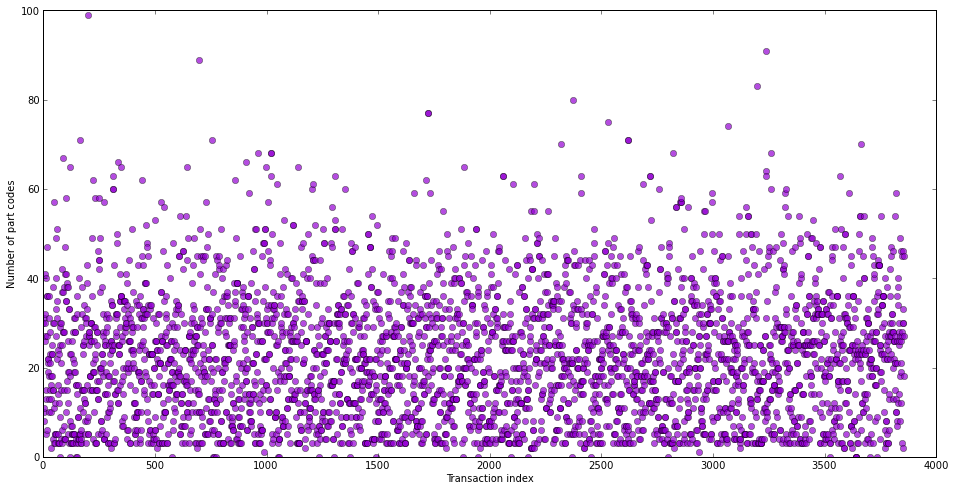

In [56]:
ntrans=len(part_code_dataset)
trindx = arange(0,ntrans)
#bar(trindx,logSupp[:,1])
plot(trindx,fullSurprise[:,1],'o',color='darkviolet',alpha=0.7)
xlabel('Transaction index')
ylabel('Number of part codes')
#plot(trindx,fullSurprise[:,0],'o',color='greenyellow',alpha=0.7)
#xlabel('Transaction index')
#ylabel('Total Surprise')

In [57]:
estimate['prt_sup'] = fullSurprise[:,0]
estimate['num_prt'] = fullSurprise[:,1]

In [58]:
estimate['prt_novelty'] = estimate['prt_sup']/estimate['num_prt']
fullNovelty = AvgNovelty(fullSurprise)
#these are equivalent

In [59]:
fullNovelty[isnan(fullNovelty)]

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan])

In [60]:
#replace nan by 0.0
#estimate[estimate.prt_novelty.isnull()]['prt_novelty'] = 0.0
estimate['prt_novelty'].fillna(0,inplace=True)#estimate.prt_novelty.isnull()]['prt_novelty']

#### Replot, ordering transactions by total cost.

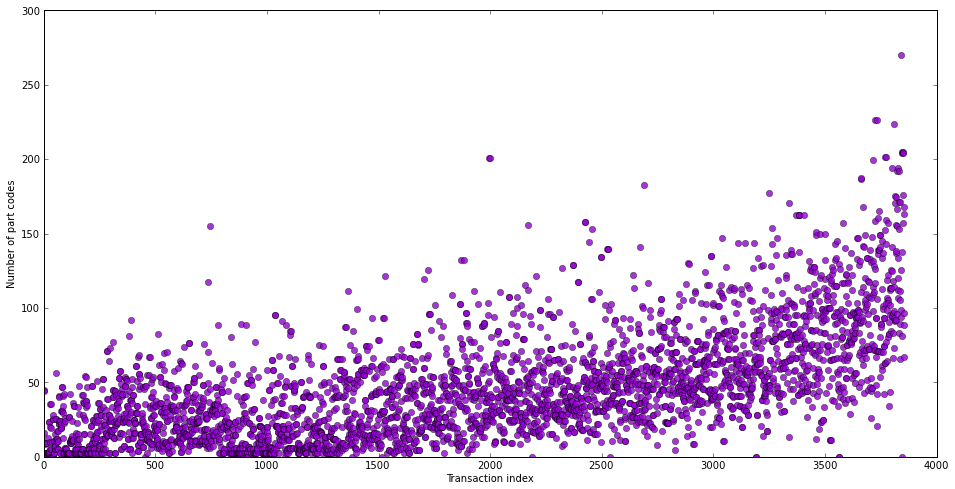

In [61]:
est_by_cost = estimate.sort(['price_amt','prmry_poi_cd'])
plot(trindx,est_by_cost['prt_sup'],'o',color='darkviolet',alpha=0.8)
xlabel('Transaction index')
ylabel('Number of part codes')

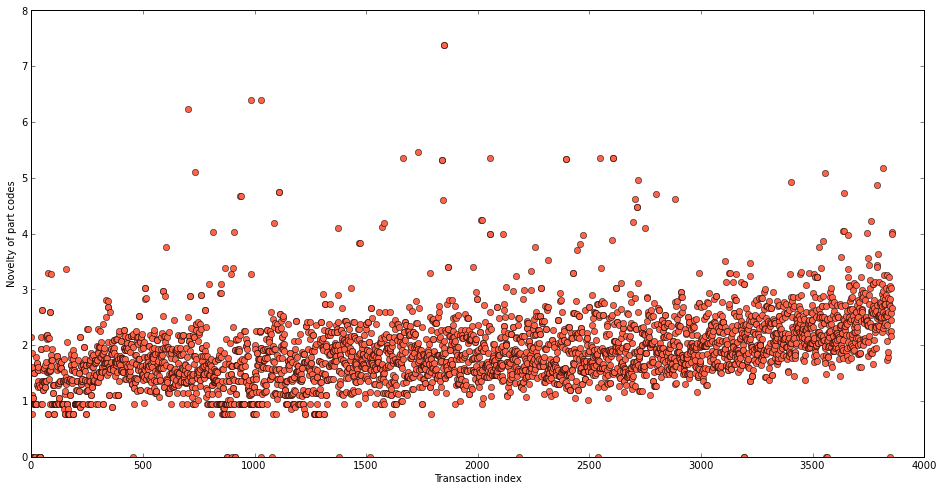

In [62]:
#est_by_cost = estimate.sort(['price_amt','prmry_poi_cd'])
plot(trindx,est_by_cost['prt_novelty'],'o',color='tomato')
xlabel('Transaction index')
ylabel('Novelty of part codes')

In [63]:
print est_by_cost['prmry_poi_cd'].value_counts()
sum(est_by_cost['prmry_poi_cd'].value_counts())

12    730
6     568
1     370
11    348
7     196
5     195
10    184
15    133
3     123
16    122
2     122
9     117
8     113
4     105
28     17
13     14
27      9
26      2
25      1
dtype: int64


3469

In [64]:
idx = est_by_cost.index#[:5]#.head()
idx[:5]#, est_by_cost[i]
print est_by_cost.ix[idx[0]][['los_est_dim_id','prt_clas_cd']]
estimate.ix[idx[0]][['prt_clas_cd','los_est_dim_id']]

los_est_dim_id                                         7.034763e+07
prt_clas_cd         1156 1156116234530000 1084 1084122728040000L...
Name: 1256, dtype: object


prt_clas_cd         1156 1156116234530000 1084 1084122728040000L...
los_est_dim_id                                         7.034763e+07
Name: 1256, dtype: object

In [65]:
#Replot, coloring by primary_poi
#print len(estimate.prmry_poi_cd.unique()), estimate.prmry_poi_cd.min(), estimate.prmry_poi_cd.max()
#create coloring
colors = ['magenta', 'dodgerblue','darkgreen','darkmagenta','darkred',
          'darksalmon','darkseagreen','darkslateblue','deeppink','deepskyblue',
          'dimgray','gainsboro','gold','greenyellow','indianred','khaki',
          'lightsteelblue','lightcoral','lightcyan','lime','lightgray',
          'maroon','mediumaquamarine','mediumorchid','midnightblue','mistyrose',
          'olive','orange','peachpuff','sienna','yellowgreen','thistle']
idx = est_by_cost.index
#c = []
#for i in idx:
#    try: 
#        cval = int(estimate.ix[i]['prmry_poi_cd'])
#    except: 
#        cval = 0
#    c.append(colors[cval])
#    #y = estimate.ix[i]['prt_sup']
#print c[:10]
#est_by_cost.prmry_poi_cd[:10]

#plot(trindx, est_by_cost,'o',color=c)#trindx,est_by_cost['prt_sup'],'o',color='darkviolet')
#xlabel('Transaction index')
#ylabel('Number of part codes')
#legend


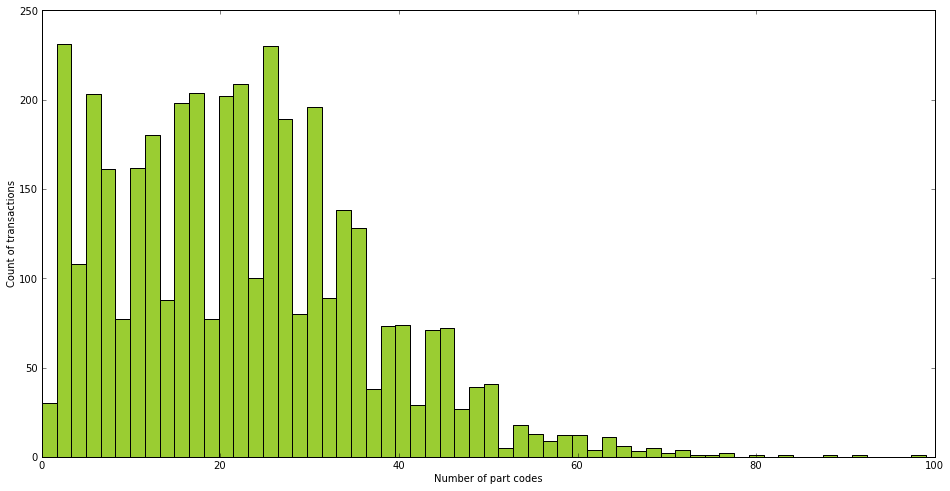

In [66]:
hist(fullSurprise[:,1],bins=60,color='yellowgreen')
xlabel('Number of part codes')
ylabel('Count of transactions')

In [67]:
#which rows have zero part-codes?
print len(fullSurprise[fullSurprise[:,1]==0,:])
#estimate.ix[logSupp[:,1]==0,:].price_amt
estimate[estimate.num_prt == 0.0][['price_amt','prmry_poi_cd']]

28


,price_amt,prmry_poi_cd
74,0.00,6
118,0.00,NaN
148,235.00,15
149,235.00,15
574,0.00,15
761,2303.47,NaN
762,2303.47,NaN
774,71.00,12
1050,375.00,3
1057,245.00,6


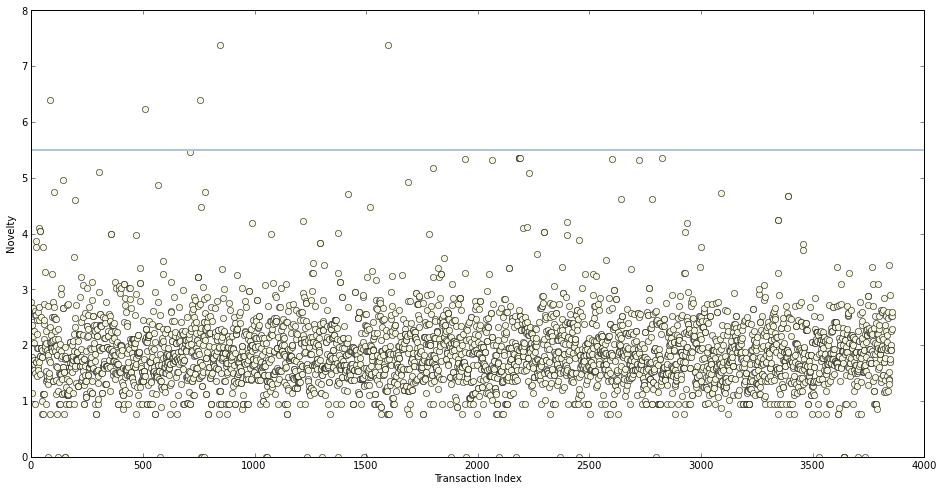

In [68]:
plot(trindx,estimate['prt_novelty'],'o',color='beige')
xlabel('Transaction Index')
ylabel('Novelty')
axhline(y=5.5,linewidth=2,color='lightsteelblue')

In [69]:
print min(estimate.prt_novelty), max(estimate.prt_novelty)
#, len(Pnovelty)
#Pnovelty < 
#hist(Pnovelty,color='burlywood')
#xlabel('average novelty')

0.0 7.37567551479


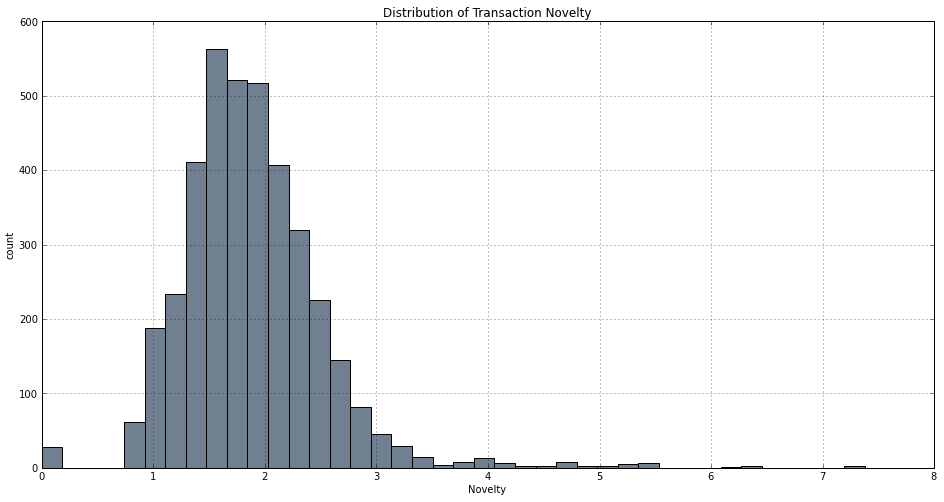

In [70]:
estimate.prt_novelty.hist(color = 'slategray', bins=40)
ylabel('count')
xlabel('Novelty')
title('Distribution of Transaction Novelty')

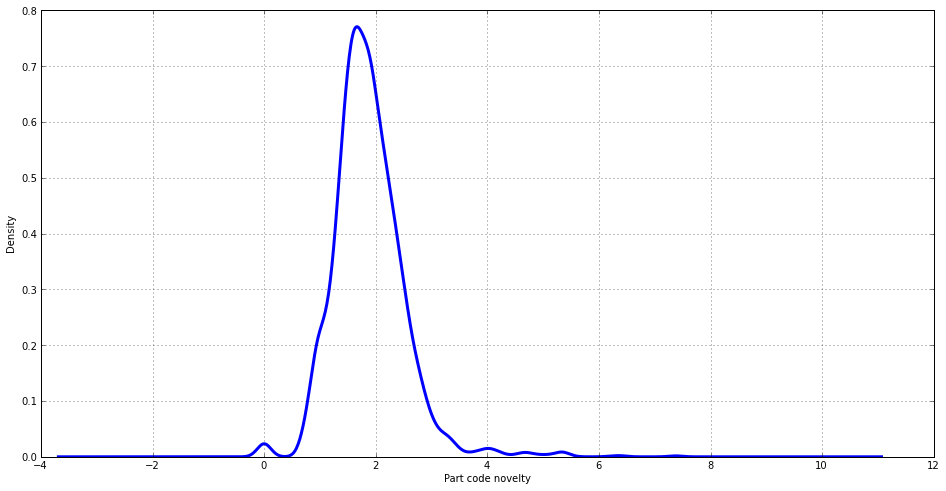

In [71]:
#from statsmodels.nonparametric import KDE, smoothers_lowess
estimate['prt_novelty'].plot(kind='kde',lw='3')   # plots a kernel desnsity estimate of the estimate part_code  novelty
xlabel('Part code novelty')

In [72]:
#acquire POI codes from excel sheet
#poicodes = dfs['Point of impact (POI)']
#poicodes
#consider extra line at top 
poicodes = xl_file.parse('Point of impact (POI)',header=1)
print poicodes.head()
#convert to a dictionary
print poicodes.columns
poiDict = {}
#for i in xrange(0,len(poicodes)):
#    print i, poicodes.ix[i]['Code']
A = poicodes['Description'].values
B = poicodes['Code '].values
for b in xrange(0,len(B)):
    poiDict[B[b]] = A[b]

#estimate.prmy_poi_cd
print poiDict[1].encode('ascii')

   Code          Description  NaN  Primary Count  Secondary Count  None.1  \
0      1  Right Front Corner  NaN            370               71     NaN   
1      2    Right Front Side  NaN            122               45     NaN   
2      3          Right Side  NaN            123               65     NaN   
3      4     Right Rear Side  NaN            105               63     NaN   
4      5   Right Rear Corner  NaN            195               57     NaN   

   None.2  None.3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  
Index([Code , Description, NaN, Primary Count, Secondary Count, None.1, None.2, None.3], dtype=object)
Right Front Corner


In [73]:
print estimate['prmry_poi_cd'].value_counts()
print sum(estimate['prmry_poi_cd'].value_counts())
#replace nan by 0.0
#estimate[estimate.prt_novelty.isnull()]['prt_novelty'] = 0.0
estimate['prmry_poi_cd'].fillna(0,inplace=True)
print estimate.prmry_poi_cd.min(), estimate.prmry_poi_cd.max()

12    730
6     568
1     370
11    348
7     196
5     195
10    184
15    133
3     123
16    122
2     122
9     117
8     113
4     105
28     17
13     14
27      9
26      2
25      1
dtype: int64
3469
0.0 28.0


In [74]:
poiCD = estimate['prmry_poi_cd'].value_counts().keys()
poiCounts = estimate['prmry_poi_cd'].value_counts().values

In [75]:
poiCounts

array([730, 568, 388, 370, 348, 196, 195, 184, 133, 123, 122, 122, 117,
       113, 105,  17,  14,   9,   2,   1], dtype=int64)

In [76]:
poiCD[:-2]

Index([12, 6 , 0 , 1 , 11, 7 , 5 , 10, 15, 3 , 2 , 16, 9 , 8 , 4 , 28, 13, 27], dtype=object)

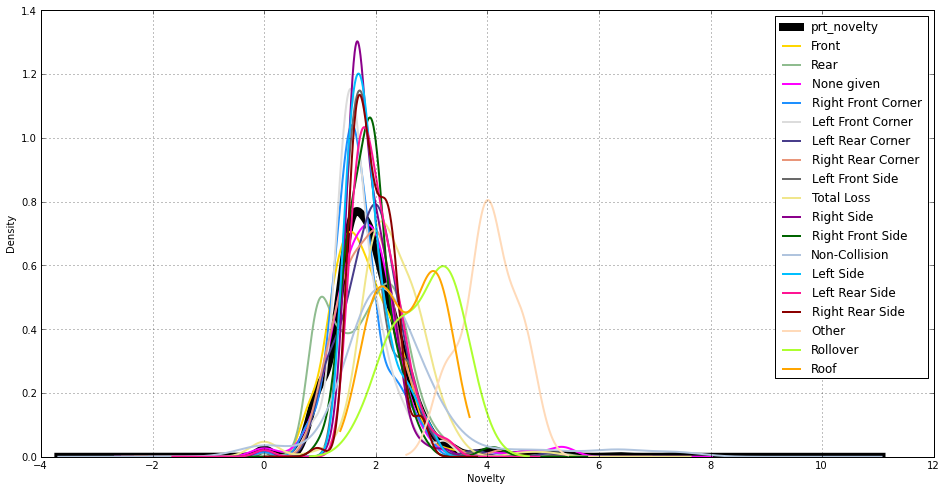

In [77]:
poiDict[0.0] = 'None given'
#Plot KDE of novelty for different pois (omit last two because only 2 & 1 point respectively
estimate.prt_novelty.plot(kind='kde',color='k',linewidth=8.0)
for i in poiCD[:-2]:
    #print i
    #if i > 10:
    #    estimate.prt_novelty[estimate.prmry_poi_cd==i].plot(kind='kde',color=colors[int(i)],linewidth=3,ls='-.',label=poiDict[i].encode('ascii'))
    #else:
    estimate.prt_novelty[estimate.prmry_poi_cd==i].plot(kind='kde',color=colors[int(i)],linewidth=2,label=poiDict[i].encode('ascii'))
#estimate.prt_novelty[estimate.prmry_poi_cd==12].plot(kind='kde',color='tomato',linewidth=2)
#estimate.prt_novelty[estimate.prmry_poi_cd==6].plot(kind='kde',color='slateblue',linewidth=2)
#estimate.prt_novelty[estimate.prmry_poi_cd==1].plot(kind='kde',color='springgreen')
#estimate.prt_novelty[estimate.prmry_poi_cd==16].plot(kind='kde',color='gold')
#estimate.prt_novelty[estimate.prmry_poi_cd==28].plot(kind='kde',color='orchid',linewidth=2)
#estimate.prt_novelty[estimate.prmry_poi_cd==15].plot(kind='kde',color='skyblue',linewidth=2)
xlabel('Novelty')
legend()
#savefig('PartsNoveltybyPOI.png',dpi=300)
#legend(('All estimates','Front','Rear','Right Front Side','Non-collision','Other','Total Loss'))

In [78]:
estimate.prt_novelty[estimate.prmry_poi_cd==25], estimate.prt_novelty[estimate.prmry_poi_cd==26] 

(2325    2.751002
Name: prt_novelty, dtype: float64,
 661     2.679296
1419    2.679296
Name: prt_novelty, dtype: float64)

In [79]:
poiLabels = [poiDict[x].encode('ascii') for x in poiCD]

1.87768179226 1.81963405707 0.64801597369
[0.0, 5.0, 10.0, 15.0, 20.0]
['None given', 'Right Rear Corner', 'Left Front Side', 'Total Loss', 'Stripped']


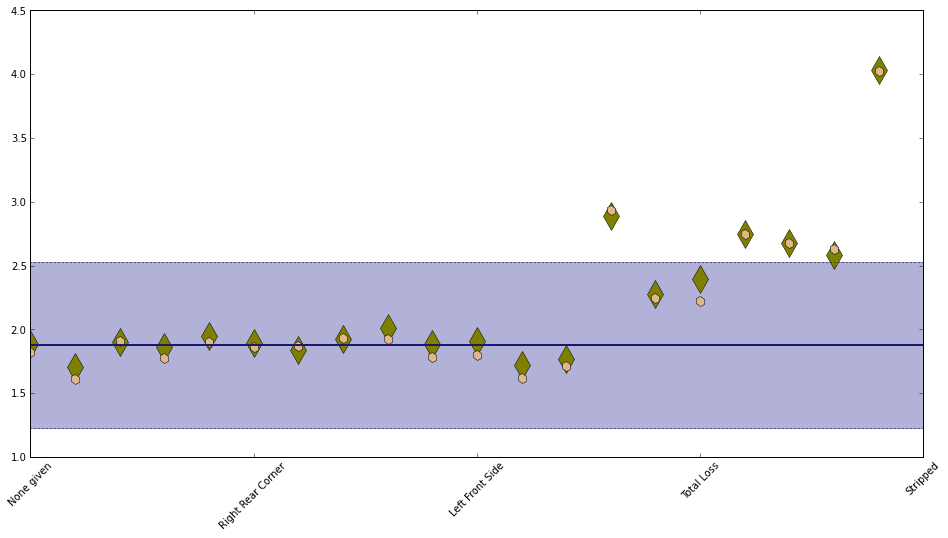

In [80]:
print estimate.prt_novelty.mean(), estimate.prt_novelty.median(), estimate.prt_novelty.std()
mu = estimate.prt_novelty.mean()
sigma = estimate.prt_novelty.std()
poiMMvalues = estimate.groupby('prmry_poi_cd')['prt_novelty'].agg([np.mean, np.median])
ax = figure().add_subplot(111)
plot(poiMMvalues['mean'],'d',ms=20,color='olive')
plot(poiMMvalues['median'],'h',ms=10,color='burlywood')
axhline(y=mu,linewidth=2,color='midnightblue')
axhline(y=mu-sigma,ls=':',color='navy')
axhline(y=mu+sigma,ls=':',color='navy')
axhspan(mu-sigma,mu+sigma, facecolor='navy', alpha=0.3)
xt = ax.get_xticks().tolist()
print xt
tlabels = [poiDict[int(x)].encode('ascii') for x in xt]
print tlabels
#tlabels = []
#for xi in xt:
#    tlabels.append(poiLabels[int(xi)])
#    ax.set_xticklabels(xi) = poiLabels[int(xi)]
ax.set_xticklabels(tlabels,rotation=45)

<p> In above plot diamonds are mean Novelty for each point of impact. The circles are medians.</p>
<p> Shaded region is $\mu \pm \sigma$ for all part code transactions</p>

In [81]:
estimate.prmry_poi_cd.value_counts()

12    730
6     568
0     388
1     370
11    348
7     196
5     195
10    184
15    133
3     123
2     122
16    122
9     117
8     113
4     105
28     17
13     14
27      9
26      2
25      1
dtype: int64

In [82]:
estimate[estimate.prt_novelty > 5.1][['price_amt','prmry_poi_cd','scdy_poi_cd','prt_qty_cnt','prt_novelty']]

,price_amt,prmry_poi_cd,scdy_poi_cd,prt_qty_cnt,prt_novelty
84,268.44,16,NaN,10,6.386239
302,172.96,7,NaN,3,5.104507
508,164.57,16,NaN,1,6.227423
711,475.75,16,NaN,5,5.463179
757,279.76,16,NaN,10,6.386239
845,522.96,16,NaN,7,7.375676
1596,522.96,16,NaN,7,7.375676
1799,4410.94,6,NaN,29,5.170686
1941,785.67,6,NaN,9,5.340310
2064,520.32,0,NaN,8,5.312238


In [83]:
estimate.ix[estimate.prt_novelty > 6.1][['prt_qty_cnt','prt_clas_cd']]

,prt_qty_cnt,prt_clas_cd
84,10,1062 1062130318450000 1062130318410000 10621...
508,1,1070 1070184317660000
757,10,1062 1062130318450000 1062130318410000 10621...
845,7,1133 1133910397440000 1133162641140000 1133162...
1596,7,1133 1133910397440000 1133162641140000 11331...


<h2> Frequent Itemsets for a given minsupport</h2>
<p> minsupport given as ksup</p>

In [84]:
ksup = 0.2
pfis, pfis_supp = apriori(part_code_dataset,ksup)

#len(pfis_supp)

In [85]:
print "Longest frequent item sets with support at or above ", ksup, "is ",len(pfis)-1
#also can get as len(pfis[len(pfis)-2][0])
for a in pfis[len(pfis)-2]:
    print a, pfis_supp[a]


Longest frequent item sets with support at or above  0.2 is  7
frozenset(['1040', '1046', '1057', '10461811', '1066', '1046181112810000', '1066134820410000']) 0.216748768473


In [86]:
#return part cd corresponding to max value:
maxx = max(pList_supp.values())             #finds the max value
keys = [x for x,y in pList_supp.items() if y ==maxx]  #list of all 
                                                   #keys whose value is equal to maxx
keys

[frozenset({'1046'})]

In [87]:
getCodes(pList_supp,0.3)
A = getCodes(pList_supp,0.3)
for a in A:
    print a, pList_supp[a]

frozenset(['1046']) 0.506611355976
frozenset(['1092']) 0.421052631579
frozenset(['1094']) 0.361161524501
frozenset(['1092181112810000']) 0.418978480684
frozenset(['1096']) 0.330049261084
frozenset(['1084']) 0.385273528649
frozenset(['1040123317400000R']) 0.324604614986
frozenset(['1086']) 0.353124189785
frozenset(['10921811']) 0.324604614986
frozenset(['10401233']) 0.352864920923
frozenset(['1046181112810000']) 0.505315011667
frozenset(['1057']) 0.452424163858
frozenset(['1066134820410000']) 0.303603837179
frozenset(['1040']) 0.505055742805
frozenset(['10461811']) 0.393570132227
frozenset(['1066']) 0.306715063521
frozenset(['1040123317400000L']) 0.327715841327
frozenset(['1055']) 0.447238786622


In [88]:
pList_supp.keys()[1]
b = 1046
pList_supp[frozenset({str(b)})]

0.5066113559761473

# Apply to front end collisions for comparison

In [89]:
# convert prt_clas_cd to transactions
p12dataset = primary12.prt_clas_cd.map(lambda x: x.split(' ')).values.tolist()
#remove blanks
p12_part_code_dataset =[]
for a in p12dataset:
    str_list = [x for x in a if x != '']
    p12_part_code_dataset.append(frozenset(str_list))


In [90]:
allParts12 = createC1(p12_part_code_dataset)

In [91]:
len(allParts),len(allParts12), len(p12_part_code_dataset),len(part_code_dataset)

(781, 426, 730, 3857)

## Fraction of transactions involved in primary_POI = 12

In [92]:
poi12ratio = float(len(p12_part_code_dataset))/float(len(part_code_dataset))
poi12ratio

0.18926626912107855

In [93]:
p12_pList, p12_List_supp = scanD(p12_part_code_dataset,allParts,0.1)

0.00025926886181 0.506611355976 781
0.0013698630137 0.917808219178 426


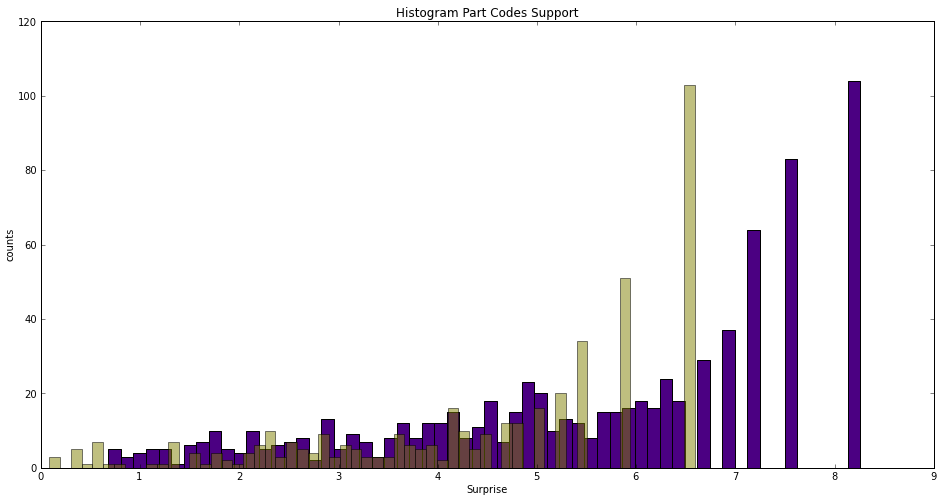

In [94]:
#plot a histogram of part_code_list support
p12_suppV = p12_List_supp.values()
print min(suppV), max(suppV), len(suppV)
print min(p12_suppV), max(p12_suppV), len(p12_suppV)
#(max(suppV) -min(suppV))
hist(-1.*log(suppV), bins=60, color='indigo')
hist(-1.*log(p12_suppV), bins=60, color='olive',alpha=0.5)
xlabel('Surprise')
ylabel('counts')
title('Histogram Part Codes Support')
#savefig('PartCodeSurprise_full_poi12_hist.png',dpi=300)

(array([367,  27,  11,   3,   1,   3,   6,   5,   0,   3]),
 array([ 0.00136986,  0.0930137 ,  0.18465753,  0.27630137,  0.36794521,
        0.45958904,  0.55123288,  0.64287671,  0.73452055,  0.82616438,
        0.91780822]),
 <a list of 10 Patch objects>)

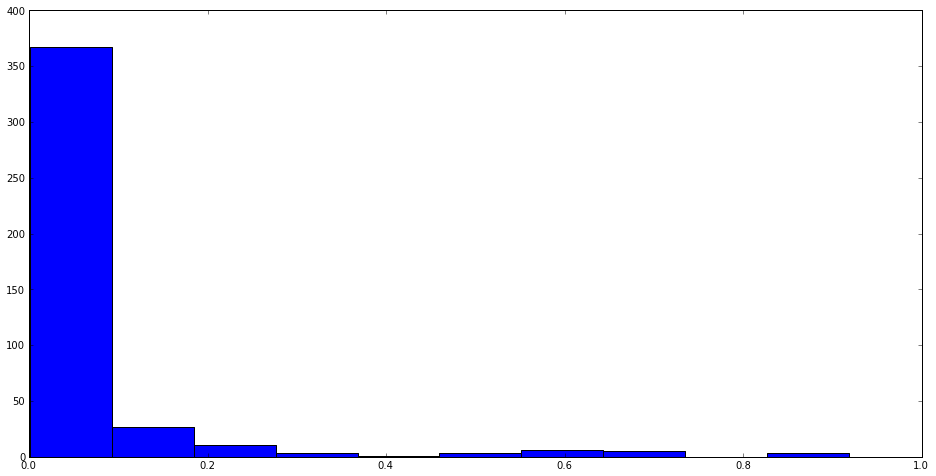

In [165]:
hist(p12_suppV)

In [95]:
len(p12_List_supp)

426

In [96]:
#find surprise
p12Surprise = surprise(p12_part_code_dataset,p12_List_supp)
#primary12['prt_sup'] = p12Surprise[:,0]
#primary12['prt_sup'] = p12Surprise[:,1]
p12Novely = AvgNovelty(p12Surprise)

In [97]:
xsupp =[]
ysupp=[]
for a in p12_List_supp:
    #print a, p12_List_supp[a],pList_supp[a]
    ysupp.append(p12_List_supp[a])
    xsupp.append(pList_supp[a])
    #compareIndvSupport.append([p12_List_supp[a],pList_supp[a]])

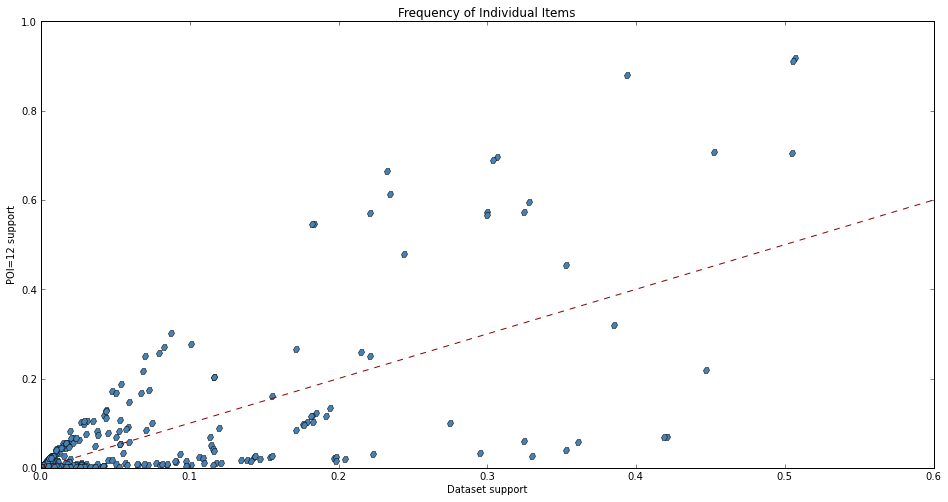

In [98]:
#compare
plot(xsupp,ysupp,'H',color='steelblue')
xlabel('Dataset support')
ylabel('POI=12 support')
title('Frequency of Individual Items')
# create a line
xv = np.linspace(0,0.6)
yv = xv/poi12ratio
plot(xv,xv,'--',color='darkred')
#plot(xv,yv,'--',color='lime')

In [99]:
ysupp[:10], dot(ysupp[:10],poi12ratio), xsupp[:10]

([0.9178082191780822,
  0.5465753424657535,
  0.0013698630136986301,
  0.0027397260273972603,
  0.0027397260273972603,
  0.056164383561643834,
  0.0027397260273972603,
  0.0136986301369863,
  0.0136986301369863,
  0.0013698630136986301],
 array([ 0.17371014,  0.10344828,  0.00025927,  0.00051854,  0.00051854,
        0.01063002,  0.00051854,  0.00259269,  0.00259269,  0.00025927]),
 [0.5066113559761473,
  0.18330308529945555,
  0.00025926886180969663,
  0.0005185377236193933,
  0.03551983406792844,
  0.018148820326678767,
  0.012704174228675136,
  0.0059631838216230235,
  0.00622245268343272,
  0.00025926886180969663])

(array([  2,   3,   0,   2,   1,   2,   4,   3,   8,  20,  15,  35, 240,
        39,  11,  12,   4,   3,   2,   3,   2,   2,   3,   0,   0,   3,
         3,   2,   1,   1]),
 array([-0.35118962, -0.32324157, -0.29529352, -0.26734548, -0.23939743,
       -0.21144938, -0.18350134, -0.15555329, -0.12760524, -0.0996572 ,
       -0.07170915, -0.0437611 , -0.01581306,  0.01213499,  0.04008304,
        0.06803108,  0.09597913,  0.12392718,  0.15187522,  0.17982327,
        0.20777132,  0.23571936,  0.26366741,  0.29161546,  0.3195635 ,
        0.34751155,  0.3754596 ,  0.40340765,  0.43135569,  0.45930374,
        0.48725179]),
 <a list of 30 Patch objects>)

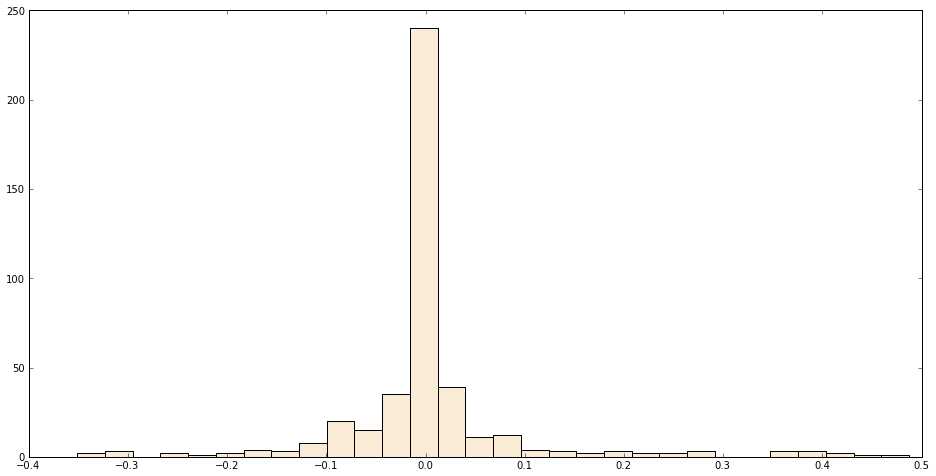

In [100]:
ysupp = array(ysupp)
xsupp = array(xsupp)
hist(ysupp-xsupp,bins=30,color='antiquewhite')

In [101]:
getCodes(p12_List_supp,0.3)
A = getCodes(p12_List_supp,0.3)
for a in A:
    print a, p12_List_supp[a]

frozenset(['1046']) 0.917808219178
frozenset(['1063']) 0.546575342466
frozenset(['1084']) 0.320547945205
frozenset(['1040123317400000R']) 0.57397260274
frozenset(['1057133319780000L']) 0.57397260274
frozenset(['1202']) 0.613698630137
frozenset(['10571333']) 0.479452054795
frozenset(['1202151623370000']) 0.301369863014
frozenset(['1046181112810000']) 0.91095890411
frozenset(['1057']) 0.708219178082
frozenset(['1202151633540000']) 0.571232876712
frozenset(['1040']) 0.704109589041
frozenset(['10461811']) 0.880821917808
frozenset(['1063132019200000']) 0.545205479452
frozenset(['1066']) 0.695890410959
frozenset(['1040123317400000L']) 0.594520547945
frozenset(['1057133319780000R']) 0.567123287671
frozenset(['10661348']) 0.665753424658
frozenset(['10401233']) 0.453424657534
frozenset(['1066134820410000']) 0.68904109589


## Define Functions to find Associative Rules and calculate Confidence

In [102]:
def generateRules(L, support_data, min_confidence=0.7):
    """Create the association rules
    L: list of frequent item sets
    support_data: support data for those itemsets
    min_confidence: minimum confidence threshold
    """
    rules = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            #print "freqSet", freqSet, 'H1', H1
            if (i > 1):
                rules_from_conseq(freqSet, H1, support_data, rules, min_confidence)
            else:
                calc_confidence(freqSet, H1, support_data, rules, min_confidence)
    return rules


def calc_confidence(freqSet, H, support_data, rules, min_confidence=0.7):
    "Evaluate the rule generated"
    pruned_H = []
    for conseq in H:
        conf = support_data[freqSet] / support_data[freqSet - conseq]
        if conf >= min_confidence:
            print freqSet - conseq, '--->', conseq, 'conf:', conf
            rules.append((freqSet - conseq, conseq, conf))
            pruned_H.append(conseq)
    return pruned_H

def rules_from_conseq(freqSet, H, support_data, rules, min_confidence=0.7):
    "Generate a set of candidate rules"
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        Hmp1 = aprioriGen(H, m + 1)
        Hmp1 = calc_confidence(freqSet, Hmp1,  support_data, rules, min_confidence)
        if len(Hmp1) > 1:
            rules_from_conseq(freqSet, Hmp1, support_data, rules, min_confidence)

In [103]:
pfisRULES = generateRules(pfis, pfis_supp,min_confidence=0.5)

frozenset(['1040123317400000R']) ---> frozenset(['1046181112810000']) conf: 0.873801916933
frozenset(['1046181112810000']) ---> frozenset(['1040123317400000R']) conf: 0.5613134941
frozenset(['1066']) ---> frozenset(['10401233']) conf: 0.702451394759
frozenset(['10401233']) ---> frozenset(['1066']) conf: 0.610580455547
frozenset(['10921811']) ---> frozenset(['1086']) conf: 0.622204472843
frozenset(['1086']) ---> frozenset(['10921811']) conf: 0.571953010279
frozenset(['1040']) ---> frozenset(['10401233']) conf: 0.698665297741
frozenset(['10401233']) ---> frozenset(['1040']) conf: 1.0
frozenset(['1040123317400000R']) ---> frozenset(['1066134820410000']) conf: 0.665335463259
frozenset(['1066134820410000']) ---> frozenset(['1040123317400000R']) conf: 0.711357813834
frozenset(['1040']) ---> frozenset(['1057133319780000L']) conf: 0.551848049281
frozenset(['1057133319780000L']) ---> frozenset(['1040']) conf: 0.929930795848
frozenset(['1046']) ---> frozenset(['1057133319780000R']) conf: 0.55373

In [104]:
len(pfisRULES)

5847

In [105]:
pfisRULES[:10]

[(frozenset({'1040123317400000R'}),
  frozenset({'1046181112810000'}),
  0.8738019169329073),
 (frozenset({'1046181112810000'}),
  frozenset({'1040123317400000R'}),
  0.5613134940995382),
 (frozenset({'1066'}), frozenset({'10401233'}), 0.7024513947590871),
 (frozenset({'10401233'}), frozenset({'1066'}), 0.6105804555473916),
 (frozenset({'10921811'}), frozenset({'1086'}), 0.6222044728434505),
 (frozenset({'1086'}), frozenset({'10921811'}), 0.5719530102790015),
 (frozenset({'1040'}), frozenset({'10401233'}), 0.6986652977412731),
 (frozenset({'10401233'}), frozenset({'1040'}), 1.0),
 (frozenset({'1040123317400000R'}),
  frozenset({'1066134820410000'}),
  0.6653354632587859),
 (frozenset({'1066134820410000'}),
  frozenset({'1040123317400000R'}),
  0.7113578138343296)]

In [106]:
pfis[:10]#(frozenset({'1040123317400000R'}),frozenset({'1046181112810000'}))]

[[frozenset({'1066134820410000'}),
  frozenset({'10401233'}),
  frozenset({'1055'}),
  frozenset({'10661348'}),
  frozenset({'10551179'}),
  frozenset({'1057133319780000R'}),
  frozenset({'1040123317400000L'}),
  frozenset({'1066'}),
  frozenset({'10861835'}),
  frozenset({'10461811'}),
  frozenset({'1040'}),
  frozenset({'1202151633540000'}),
  frozenset({'1057'}),
  frozenset({'1046181112810000'}),
  frozenset({'1084122728040000R'}),
  frozenset({'10571333'}),
  frozenset({'1202'}),
  frozenset({'10941179'}),
  frozenset({'1084122728040000L'}),
  frozenset({'10921811'}),
  frozenset({'1057133319780000L'}),
  frozenset({'1086'}),
  frozenset({'1040123317400000R'}),
  frozenset({'1084'}),
  frozenset({'1096174031740000R'}),
  frozenset({'1096'}),
  frozenset({'1092181112810000'}),
  frozenset({'1094'}),
  frozenset({'1092'}),
  frozenset({'1046'})],
 [frozenset({'1040123317400000R', '1046181112810000'}),
  frozenset({'10401233', '1066'}),
  frozenset({'1086', '10921811'}),
  frozenset(

In [107]:
pfisRULES[20]

(frozenset({'1057133319780000R'}), frozenset({'1040'}), 0.9273356401384083)

### Get set of confidences for parts code assoc. Rules

In [108]:
pfisConfidences = []
for i in xrange(0,len(pfisRULES)):
    #print i, pfisRULES[i][-1]
    pfisConfidences.append(pfisRULES[i][-1])
    #tmpFIS = pfis[i]

pfisConfidences = np.array(pfisConfidences)

(array([285, 165, 138, 216, 262, 105, 128, 242, 204, 200, 165, 151, 163,
       233, 255, 130, 107, 146, 173,  78, 147, 160, 240, 129, 233, 389,
       312, 115, 144, 432]),
 array([ 0.5       ,  0.51666667,  0.53333333,  0.55      ,  0.56666667,
        0.58333333,  0.6       ,  0.61666667,  0.63333333,  0.65      ,
        0.66666667,  0.68333333,  0.7       ,  0.71666667,  0.73333333,
        0.75      ,  0.76666667,  0.78333333,  0.8       ,  0.81666667,
        0.83333333,  0.85      ,  0.86666667,  0.88333333,  0.9       ,
        0.91666667,  0.93333333,  0.95      ,  0.96666667,  0.98333333,  1.        ]),
 <a list of 30 Patch objects>)

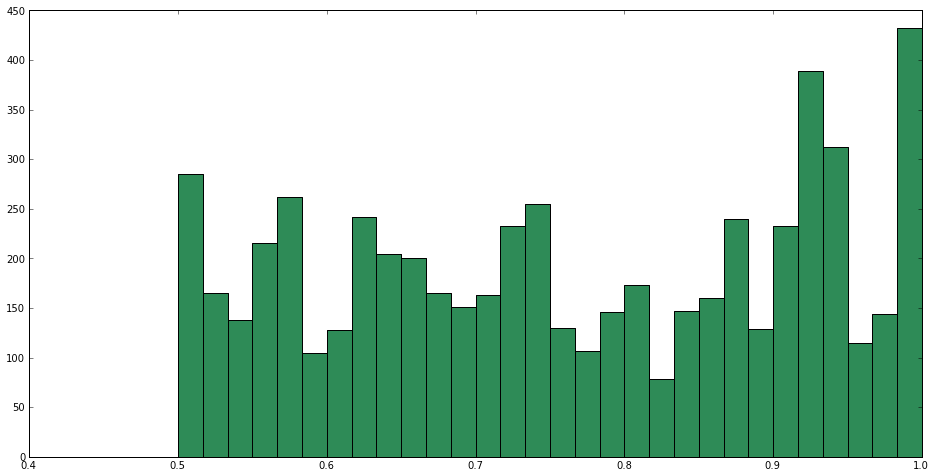

In [109]:
hist(pfisConfidences,bins=30,color='seagreen')

In [110]:
x1 = pfis_supp[(frozenset({'1040123317400000R'}))]
x2 = pfis_supp[(frozenset({'1046181112810000'}))]
y1 = pfis_supp[(frozenset({'1040123317400000R','1046181112810000'}))]
x3 = pfis_supp[(frozenset({'1040123317400000L'}))]
print x1,x2, y1
print pfisConfidences[0]
y1/x1
# Good they match

0.324604614986 0.505315011667 0.28364013482
0.873801916933


0.8738019169329073

### Get Supports for these Rules

In [111]:
pfisRULES[0]

(frozenset({'1040123317400000R'}),
 frozenset({'1046181112810000'}),
 0.8738019169329073)

In [112]:
from itertools import chain
pfisRuleSupports = []
pfisRulelength = []
for i in xrange(0,len(pfisRULES)):

    H = map(list,pfisRULES[i][:-1])
    pfisRulelength.append(len(H))
    I = list(chain.from_iterable(H))
    I.sort()  
    J = frozenset(x for x in I)
    pfisRuleSupports.append(pfis_supp[J])


pfisRuleSupports = np.array(pfisRuleSupports)
pfisRulelength=np.array(pfisRulelength)

In [113]:
pfis_supp[frozenset({'1040123317400000R','1066134820410000'})]

0.2159709618874773

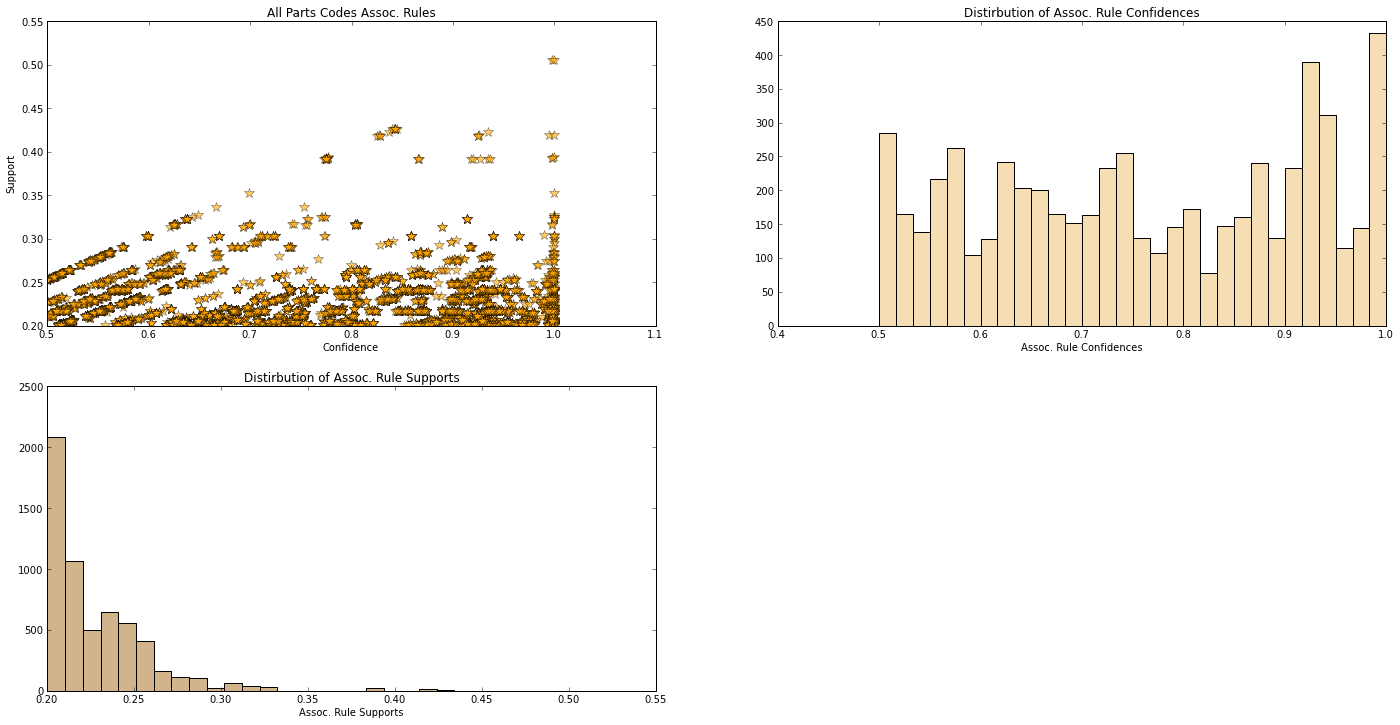

In [114]:
figure(figsize=(24,12))
subplot(2,2,1)
plot(pfisConfidences,pfisRuleSupports,'*',ms=10,color='orange',alpha=0.6)
xlabel('Confidence')
ylabel('Support')
title('All Parts Codes Assoc. Rules')
subplot(2,2,2)
hist(pfisConfidences,bins=30,color='wheat')
title('Distirbution of Assoc. Rule Confidences')
xlabel('Assoc. Rule Confidences')
subplot(2,2,3)
hist(pfisRuleSupports,bins=30,color='tan')
title('Distirbution of Assoc. Rule Supports')
xlabel('Assoc. Rule Supports')
##subplot(3,3,4)
#hist(pfisRulelength,bins=30)


## Which rules have over 90% confidence?

In [115]:
print len(pfisConfidences), " ARs have over 50% confidence"
print len(pfisConfidences[pfisConfidences>=0.9]), " ARs have over 90% confidence"
print len(pfisConfidences[pfisConfidences>=0.95]), " ARs have over 95% confidence"
print len(pfisConfidences[pfisConfidences==1.0]), " ARs have 100% confidence"

5847  ARs have over 50% confidence
1625  ARs have over 90% confidence
691  ARs have over 95% confidence
170  ARs have 100% confidence


In [116]:
#onehundred = pfisConfidences[pfisConfidences==1.0].index
onehundredIDX =(pfisConfidences==1.0).nonzero()[0]
#hist(pfisRuleSupports[onehundredIDX])
[pfisRULES[x] for x in onehundredIDX]

[(frozenset({'10401233'}), frozenset({'1040'}), 1.0),
 (frozenset({'1057133319780000R'}), frozenset({'1057'}), 1.0),
 (frozenset({'1040123317400000L'}), frozenset({'1040'}), 1.0),
 (frozenset({'1040123317400000R'}), frozenset({'1040'}), 1.0),
 (frozenset({'1066134820410000'}), frozenset({'1066'}), 1.0),
 (frozenset({'10571333'}), frozenset({'1057'}), 1.0),
 (frozenset({'1092181112810000'}), frozenset({'1092'}), 1.0),
 (frozenset({'1084122728040000L'}), frozenset({'1084'}), 1.0),
 (frozenset({'10461811'}), frozenset({'1046'}), 1.0),
 (frozenset({'1084122728040000R'}), frozenset({'1084'}), 1.0),
 (frozenset({'1046181112810000'}), frozenset({'1046'}), 1.0),
 (frozenset({'10551179'}), frozenset({'1055'}), 1.0),
 (frozenset({'10921811'}), frozenset({'1092'}), 1.0),
 (frozenset({'10941179'}), frozenset({'1094'}), 1.0),
 (frozenset({'1057133319780000L'}), frozenset({'1057'}), 1.0),
 (frozenset({'10661348'}), frozenset({'1066'}), 1.0),
 (frozenset({'1202151633540000'}), frozenset({'1202'}), 1.

#### Find Interesting rules.

In [117]:
def extract_code(fzset):
    cd = list(fzset)
    return cd

def keep_interesting(X,Y):
    iflag = 1
    xcd = extract_code(X)
    ycd = extract_code(Y)
    scd = xcd+ycd
    minscdlen = min([len(aa) for aa in scd])
    #minelem = min(len(xcd),len(ycd))
    #print minscdlen
    for icd in xcd:
        for jcd in ycd:
            if (icd[:minscdlen] == jcd[:minscdlen]):
                iflag = 0
                return iflag
    
    return iflag
    #find the minimum 
    #for i in xcd:
        

In [118]:
interestingPFISrules = []
keepPFISconf = []
#rTEST = pfisRULES[300:310]
for X,Y,conf in pfisRULES:
    
    xcd = extract_code(X)
    ycd=extract_code(Y)
    scd = xcd+ycd
    scdlen= [len(aa) for aa in scd]
    minscdlen = min(scdlen)
    #print [aa[:minscdlen] for aa in scd]
    #min(len(aa) for aa in xcd+ycd)
    #for icd in xcd:
        
    #for jcd in ycd:
        
    #    print i, len(i)
    #print extract_code(Y)
    if keep_interesting(X,Y) > 0:
        print extract_code(X), "--> ",extract_code(Y), conf,len(extract_code(Y))
        interestingPFISrules.append((X,Y,conf))
        keepPFISconf.append(conf)
    

['1040123317400000R'] -->  ['1046181112810000'] 0.873801916933 1
['1046181112810000'] -->  ['1040123317400000R'] 0.5613134941 1
['1066'] -->  ['10401233'] 0.702451394759 1
['10401233'] -->  ['1066'] 0.610580455547 1
['10921811'] -->  ['1086'] 0.622204472843 1
['1086'] -->  ['10921811'] 0.571953010279 1
['1040123317400000R'] -->  ['1066134820410000'] 0.665335463259 1
['1066134820410000'] -->  ['1040123317400000R'] 0.711357813834 1
['1040'] -->  ['1057133319780000L'] 0.551848049281 1
['1057133319780000L'] -->  ['1040'] 0.929930795848 1
['1046'] -->  ['1057133319780000R'] 0.553735926305 1
['1057133319780000R'] -->  ['1046'] 0.93598615917 1
['1040123317400000L'] -->  ['1057133319780000L'] 0.795094936709 1
['1057133319780000L'] -->  ['1040123317400000L'] 0.86937716263 1
['1092'] -->  ['1086'] 0.705049261084 1
['1086'] -->  ['1092'] 0.840675477239 1
['1057'] -->  ['1084'] 0.551289398281 1
['1084'] -->  ['1057'] 0.647375504711 1
['1057133319780000R'] -->  ['1040'] 0.927335640138 1
['1040'] --

In [119]:
y = ['1096','1092']
y2 = frozenset(y)
print y, y2
#pfis_supp[y]
pfis_supp[y2]

['1096', '1092'] frozenset(['1096', '1092'])


0.2978999222193415

In [144]:
print len(interestingPFISrules),len(pfisRULES)
float(len(interestingPFISrules))/float(len(pfisRULES))

1590 5847


0.2719343252950231

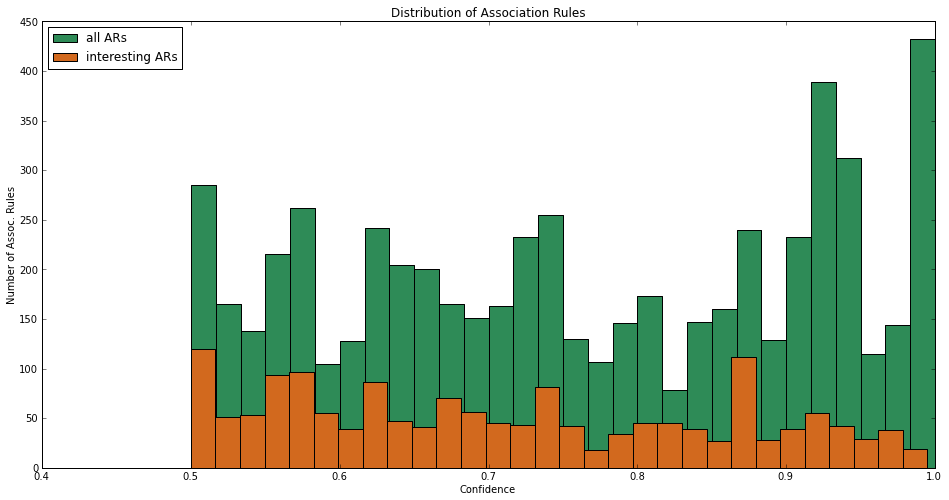

In [121]:
hist(pfisConfidences,bins=30,color='seagreen',label='all ARs')
hist(keepPFISconf,bins=30,color='chocolate',label='interesting ARs')
legend(loc=2)
xlabel('Confidence')
ylabel('Number of Assoc. Rules')
title('Distribution of Association Rules')

In [122]:
def calc_lift(rules, support, confidence_data):
    #def calc_confidence(freqSet, H, support_data, rules, min_confidence=0.7):
    "Evaluate the rule generated"
    lift_values = []
    for X,Y, conf in rules:#conseq in H:
        supp = support[Y]
        #print X, '---> ', Y,  'conf:', conf, 'support(Y):', support[Y]
        #conf = support_data[freqSet] / support_data[freqSet - conseq]
        #if conf >= min_confidence:
        #    print freqSet - conseq, '--->', conseq, 'conf:', conf
        #    rules.append((freqSet - conseq, conseq, conf))
        #    pruned_H.append(conseq)
        lift = conf/supp
        print extract_code(X),'-->', extract_code(Y), 'conf: ', conf, 'lift: ',lift 
        #, 'support(Y) :', supp
        lift_values.append(lift)
    return lift_values

In [123]:
keepPFISlift = calc_lift(interestingPFISrules, pfis_supp, keepPFISconf)

['1040123317400000R'] --> ['1046181112810000'] conf:  0.873801916933 lift:  1.72922216193
['1046181112810000'] --> ['1040123317400000R'] conf:  0.5613134941 lift:  1.72922216193
['1066'] --> ['10401233'] conf:  0.702451394759 lift:  1.99070905921
['10401233'] --> ['1066'] conf:  0.610580455547 lift:  1.99070905921
['10921811'] --> ['1086'] conf:  0.622204472843 lift:  1.7619990101
['1086'] --> ['10921811'] conf:  0.571953010279 lift:  1.7619990101
['1040123317400000R'] --> ['1066134820410000'] conf:  0.665335463259 lift:  2.19145933543
['1066134820410000'] --> ['1040123317400000R'] conf:  0.711357813834 lift:  2.19145933543
['1040'] --> ['1057133319780000L'] conf:  0.551848049281 lift:  1.84124388069
['1057133319780000L'] --> ['1040'] conf:  0.929930795848 lift:  1.84124388069
['1046'] --> ['1057133319780000R'] conf:  0.553735926305 lift:  1.84754279218
['1057133319780000R'] --> ['1046'] conf:  0.93598615917 lift:  1.84754279218
['1040123317400000L'] --> ['1057133319780000L'] conf:  0.

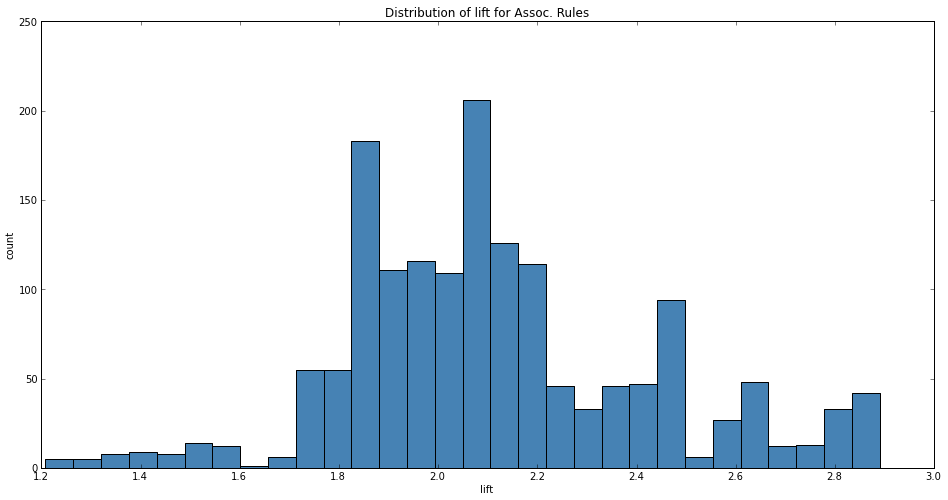

In [125]:
hist(keepPFISlift,color='steelblue', bins=30)
xlabel('lift')
ylabel('count')
title('Distribution of lift for Assoc. Rules')

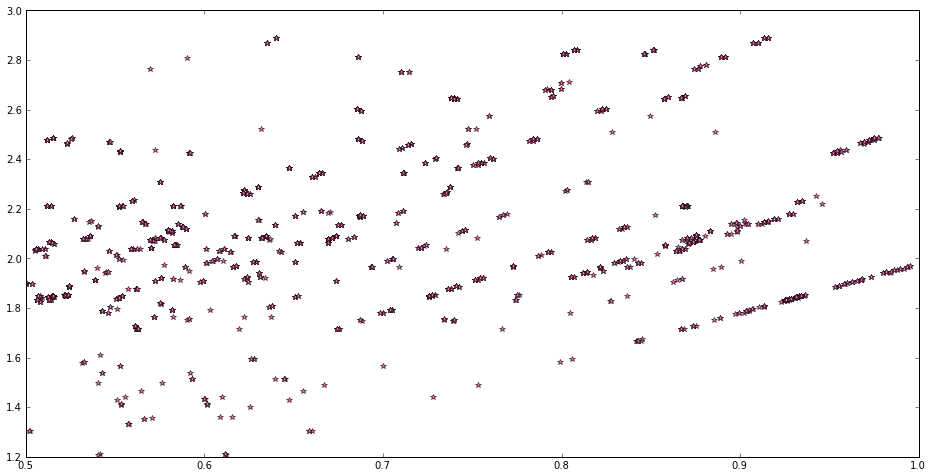

In [126]:
plot(keepPFISconf,keepPFISlift,'*',color='hotpink')

In [190]:
keepPFISlift >=2.6

True

In [207]:
#print 
hoodLAMP = pfis_supp[(frozenset({'1066','1057'}))]
bumperFender = pfis_supp[(frozenset({'1040','10461811'}))]
seto4 = pfis_supp[(frozenset({'1066','1057','1040','10461811'}))]
print seto4/hoodLAMP, seto4/bumperFender
print seto4/hoodLAMP/bumperFender
hoodBumper = pfis_supp[(frozenset({'1066','10461811'}))]
lampFender = pfis_supp[(frozenset({'1040','1057'}))]
print seto4/hoodBumper, seto4/lampFender
print seto4/hoodBumper/lampFender
lampBumper = pfis_supp[(frozenset({'1057','10461811'}))]
hoodFender = pfis_supp[(frozenset({'1040','1066'}))]
print seto4/lampBumper, seto4/hoodFender
print seto4/lampBumper/hoodFender

0.822091886608 0.687653311529
2.5926479204
0.870600414079 0.515950920245
2.0600649062
0.68821603928 0.783783783784
2.47385765471


In [208]:
seto4

0.21804511278195488

## Apply to POI=12 FIS

### Calculate Frequent Itemsets for POI=12

In [ ]:
#if precalculated load; otherwise recalculate and save
import csv
fisfile = 'p12fis.csv'

rf = csv.reader(open(fisfile,'r'))
close(fisfile)
#if 

In [102]:

#%time
p12_L2, p12_L2supp = apriori(p12_part_code_dataset,0.2)

KeyboardInterrupt: 

Wall time: 0 ns


In [ ]:
#save to csv file
#w=csv.writer(open("p12fis.csv","w"))
#for k in xrange(0,len(p12_L2)):
#    for i in p12_L2[k]:
#        w.writerow([i,p12_L2supp[i]])
#
#close("p12fis.csv")

In [ ]:
print len(p12_L2)
p12_L2[15]

In [ ]:
print "Longest frequent item sets with support at or above ", ksup, "is ",len(p12_L2)-1
#also can get as len(pfis[len(pfis)-2][0])
for a in p12_L2[len(p12_L2)-2]:
    print a, p12_L2supp[a]

In [ ]:
print len(p12_L2[8])
p12_L2supp[p12_L2[15][0]]

In [284]:
for i in p12_L2[14]:
    print i,p12_L2supp[i]

frozenset(['1057133319780000L', '1202', '1046181112810000', '1040', '1066134820410000', '1063132019200000', '1040123317400000R', '1046', '1057', '10461811', '1063', '10661348', '1066', '1057133319780000R', '1040123317400000L']) 0.227397260274
frozenset(['1057133319780000L', '1202', '1046181112810000', '1202151633540000', '1066134820410000', '1063132019200000', '1040123317400000R', '1046', '1057', '10461811', '1063', '10661348', '1066', '1057133319780000R', '1040123317400000L']) 0.227397260274
frozenset(['1057133319780000L', '1202', '1046181112810000', '1202151633540000', '1040', '1066134820410000', '1063132019200000', '1040123317400000R', '1057', '10461811', '1063', '10661348', '1066', '1057133319780000R', '1040123317400000L']) 0.227397260274
frozenset(['1202', '1046181112810000', '1202151633540000', '1040', '1066134820410000', '1063132019200000', '1040123317400000R', '1046', '1057', '10461811', '1063', '1057133319780000L', '1066', '1057133319780000R', '1040123317400000L']) 0.228767123

## STOP HERE

In [90]:
for a in pL2[6][0]:
    print a,pL2supp[frozenset({str(a)})]#, pL2supp[map(frozenset,a)]

1040 0.505055742805
1046 0.506611355976
1057 0.452424163858
10461811 0.393570132227
1066 0.306715063521
1046181112810000 0.505315011667
1066134820410000 0.303603837179


In [21]:
p1 = estimate.prt_clas_cd[0]
print p1
print len(p1.split(' '))
pp1 = filter(None,p1.split(' '))
print len(pp1)
#pp1
frozenset(pp1)

1092181112810000 10921811  1089 1089152326860000 10891523 10891523 10891523 1089124127050000 1089138629330000L 1089138629330000R 1089138628600000R 1089138628600000L 1099 1099910397079115R 1099910392580000 1099910397079115L 1046 1046181112810000 1046181112810000 10461811  1086 1086183526550000R 10861835 10861835 1086183526550000L 10861835 10861835 10861835      1145 1145140133130000 11451401  1145122724170000 1145138633010000 1096 1096174031740000L 1096174031740000R 1092 10921811
46
38


In [55]:
print estimate[['lbr_oprtn_cd']].head()
print estimate[['lbr_type_cd']].head()
print estimate[['prt_type_cd']].head()

                                        lbr_oprtn_cd
0  OP11 OP6 OP11  OP11 OP6 OP6 OP6 OP12 OP2 OP2 O...
1   OP11 OP6    OP2 OP2 OP2 OP2 OP2 OP2  OP16 OP1...
2   OP11 OP6    OP2 OP2 OP2 OP2 OP2 OP2  OP16 OP1...
3      OP16  OP5 OP11 OP6 OP2  OP2  OP11 OP14 OP11  
4   OP2  OP2  OP15 OP16  OP2  OP2 OP2  OP9 OP6 OP...
                                         lbr_type_cd
0  LAB LA2S LAB  LAB LAR LA2S LAUT LAB LAB LAB LA...
1   LAB LA2S LAB LAB LAB LAB LAB LAB LAB LAB LAB ...
2   LAB LA2S LAB LAB LAB LAB LAB LAB LAB LAB LAB ...
3          LAB  LAB LAB LA2S LAB  LAB  LAB LAB LAB  
4   LAB  LAB  LAB LAB  LAB  LAB LAB  LAB LA2S LAB...
                                         prt_type_cd
0  PAL    PAN    PAN PAE PAE PAE PAE      PAE PAE...
1            PAL     PAE PAE PAE PAE PAE PAE    PAE 
2       PAL     PAE PAE PAE PAE PAE PAE    PAE  PAE 
3                                PAN    PAE  PAL    
4   PAE  PAE  PAE   PAE  PAE PAE  PAE  PAE PAE PA...


### Calculate the background frequency for each code type (parts, part_type, labor_type, and labor_operation_type)

In [136]:
# look at the original details to get freq counts of each prt_clas_cd:
partCounts = detail.prt_clas_cd.value_counts().to_dict()
oprtnCounts = detail.lbr_oprtn_cd.value_counts().to_dict()
ltypeCounts = detail.lbr_type_cd.value_counts().to_dict()
ptypeCounts = detail.prt_type_cd.value_counts().to_dict()

In [138]:
parts['1145'], oprtnCounts['OP11'], ltypeCounts['LAB'],ptypeCounts['PAE']

(454, 23546, 82481, 36264)

In [ ]:
def group_col2list(df,col,indx):
    A = filter(None, df[df.los_est_dim_id == indx][col].values)
    #A = filter('None', A)
    if 'None' in A:
        A = filter(lambda x: x == 'None', A)
    
    B = map(lambda x: x.encode('ascii','ignore'), A)
    #print A 
    return B

In [ ]:
#(dtemp.dtypes).loc['line_adjst_pct']#prt_type_cd']
KK = group_col2list(dtemp,'lbr_type_cd',ledi[3])
print KK
dtemp[dtemp['los_est_dim_id'] == ledi[3]]['lbr_type_cd']

In [ ]:
#HERE IT IS ALMOST:
#dtemp.groupby('los_est_dim_id')['lbr_oprtn_cd'].agg(lambda x: "|".join(x.tolist()))
#dtemp.groupby('los_est_dim_id')['lbr_oprtn_cd'].agg(lambda x: "|".join(x.tolist()) if x)

In [ ]:
cust = lambda g: "|".join(g.tolist())
#def cust2:
    
cust2 = lambda g: "|".join(g.tolist())
#f = {'lbr_oprtn_cd': cust,'lbr_type_cd': cust, 'prt_clas_cd': cust2,'prt_type_cd': cust}
f = {'prt_clas_cd': cust}
dd[:15].groupby('los_est_dim_id').agg(f)
dd.head(10)

In [ ]:
dd = dtemp[['los_est_dim_id','lbr_type_cd','lbr_oprtn_cd','prt_type_cd','prt_clas_cd']]
print dd.head(10)
#dd.where(, "")
ddd = dd.replace(None, '')
print ddd.head(10)
KEEP = ddd.groupby('los_est_dim_id').agg(lambda x: "|".join(x.tolist()))
##d2 = dd[['los_est_dim_id','lbr_oprtn_cd','prt_clas_cd','lbr_type_cd']]
##print d2.head(20)
##dd.tail(10)
#d2.groupby('los_est_dim_id').agg(lambda x: "|".join(x.tolist()))
#dd[:6].groupby('los_est_dim_id').agg(lambda x: "|".join(x.tolist()))
#dd.groupby('los_est_dim_id').agg(lambda x: "|".join(x.tolist()))

In [ ]:
KEEP['lbr_oprtn_cd']

In [ ]:
def gp2list():
    lambda x: "|".join(x.tolist()

In [ ]:
HH = group_col2list(dtemp,'prt_clas_cd',ledi[3])

print HH

In [18]:
#load pyfim
#pyfmfile = 'C:\\Users\\KESJ\\code\\python\\library\\pyfim.py'
import sys
sys.path.append('C:\Users\KESJ\code\python\library')
import pyfim as fim
partFIMa = fim.fim(part_code_dataset)

In [ ]:
#trying simple loop
ledi = losest.los_est_dim_id.unique()
print ledi[:10]

for j in ledi[:10]:
    #print j, detail[detail.los_est_dim_id == j]['lbr_oprtn_cd'].values    
    P1 = group_col2list(detail,'prt_type_cd',j)
    P0 = group_col2list(detail,'prt_clas_cd',j)
    L2 = group_col2list(detail, 'lbr_oprtn_cd',j)
    L1 = group_col2list(detail, 'lbr_type_cd', j)
    print j, P0,P1,L1,L2

In [ ]:
dd['prt_type_cd'] = dd['prt_type_cd'].astype(str)
dd[dd['prt_type_cd'].isnull()]
#dd.head(10)

In [ ]:
print len(estimate)
estimate.ix[0]

In [ ]:
etemp = estimate.set_index(['los_est_dim_id','los_est_busn_id_x'])

etemp.ix[70192712]

### Create an array of estimate ID numbers (1st part of multi-index)

In [ ]:
estIDs = estimate.los_est_dim_id.unique()
len(estIDs)

In [ ]:
linesPerEstimate = estimate.los_est_dim_id.value_counts()
linesPerEstimate.ix[estIDs[14]] # way to access number of lines per estimate given an estimate id number

In [ ]:
#GROUPBY examples
ESTgrp = estimate.groupby('los_est_dim_id')
print len(ESTgrp)

In [ ]:
# Total counts for an estimate : number of hours, amts, etc.
#ESTgrp.price_amt.sum(), ESTgrp.lbr_hr_cnt.sum(), ESTgrp.lbr_hr_dbase_cnt.sum()
ESTgrp.los_est_busn_id_x.max()

In [ ]:
estimate.columns

In [ ]:
losest[~losest.vin_veh_yr_num.isnull()]
le = losest.dropna(how='all',axis=1)

print len(losest.columns),len(le.columns)
print le.columns
dd = detail.dropna(how='all',axis=1)
len(dd.columns)

In [ ]:
#assign total amounts (of hours and prices) to array for each estimate (los_est_dim_id)
amts = []
for EST_id, group in ESTgrp:
    #print EST_id
    #print group[['veh_yr_num','ttl_los_ind']].max()
    #print group[['prmry_poi_cd','scdy_poi_cd']].max()
    amts.append(group[['price_amt','dbase_price_amt','paint_hr_cnt','paint_hr_dbase_cnt','lbr_hr_cnt','lbr_hr_dbase_cnt']].sum())
    #print group[['price_amt','lbr_hr_cnt']].sum()

In [ ]:
amts

In [ ]:
compValues = []
type(amts)
for i in amts:
    a = i['price_amt']
    b = i['dbase_price_amt']
    print a,b
    compValues.append([a,b,i['paint_hr_cnt'],i['paint_hr_dbase_cnt'], i['lbr_hr_cnt'],i['lbr_hr_dbase_cnt']])

compValues = np.array(compValues)
print shape(compValues)

In [ ]:
figure(figsize=(20,14))
#figure(figsize=(10,5))
subplot(2,2,1)
x  = compValues[:,0]
y =compValues[:,1]
fit = polyfit(x,y,1)
fit_fn = poly1d(fit)
#plot(x,y,'ro',x,fit_fn(x),'--k')
plot(compValues[:,0],compValues[:,1],'o',color='orchid')
plot(x,fit_fn(x), ':k')
xlabel('price_amt')
ylabel('dbase_price_amt')
subplot(2,2,2)
plot(compValues[:,2],compValues[:,3],'o',color='lime')
x = compValues[:,2]
y=compValues[:,3]
fit = polyfit(x,y,1)
fit_fn = poly1d(fit)
plot(x,fit_fn(x),':k')
xlabel('paint_hr_cnt')
ylabel('paint_hr_dbase_cnt')
subplot(2,2,3)
plot(compValues[:,4],compValues[:,5],'o',color='burlywood')
xlabel('lbr_hr_cnt')
ylabel('lbr_hr_dbase_cnt')




In [ ]:
corrcoef(compValues[:,0],compValues[:,1]), corrcoef(compValues[:,2],compValues[:,3]), corrcoef(compValues[:,4],compValues[:,5])

In [ ]:
# some summary info
print estimate.veh_drvbl_ind.value_counts()
print estimate.ttl_los_ind.value_counts()
print estimate.veh_yr_num[0], len(estimate)
estimate.veh_licns_st_cd.value_counts()

### Return to look at ESTgrp

In [ ]:
#Agregate part_clas_cd to list
def makeList():
    
#amts = []
for EST_id, group in ESTgrp:
    print group(['part_clas_cd'])
    #print EST_id
    #print group[['veh_yr_num','ttl_los_ind']].max()
    #print group[['prmry_poi_cd','scdy_poi_cd']].max()
    #amts.append(group[['price_amt','dbase_price_amt','paint_hr_cnt','paint_hr_dbase_cnt','lbr_hr_cnt','lbr_hr_dbase_cnt']].sum())
    #print group[['price_amt','lbr_hr_cnt']].sum()

In [ ]:
# doing it in a loop:
for row in xrange(0,len(detail)):
    print detail.ix[row][['los_est_dim_id','prt_clas_cd']]

In [ ]:
#ESTgrp.last()['prt_clas_cd']#.agg(lambda x: x.iloc[x.prt_clas_cd
def add
def add_col(df, col_name, col_entry):
    df = df.copy() # so as not to change df_lunch etc.
    df[col_name] = col_entry
    return df
ESTgrp.agg(lambda x: x.iloc[x.prt_clas_cd])

In [ ]:
estimate['prt_clas_cd'].map(str)

In [ ]:
losest.ix[0]
#pd.concat(losest,detail,keys='los_est_dim_id')

#  -------------------------- OLD code follows --------------------------

In [ ]:
#functions to convert columns
import re
import datetime
def dollars2float(x):
    y = map(float,x.split(','))
    if len(y) == 1:
        return y[0]
    elif len(y) == 2:
        return 1000.*y[0]+y[1]
    elif len(y) ==3:
        return 1000000.*y[0]+1000.*y[1]+y[2]
    
def strdate2date(x):
    y = map(int,x.split('-'))
    conv_date = datetime.date(y[0],y[1],y[2])
    return conv_date

def strtime2time(x):
    y = map(int,x.split(':'))
    conv_time = datetime.time(y[0],y[1],y[2])
    return conv_time   

In [ ]:
#function to parse columns for this data
tstmpcol =[]
datecol = []
timecol = []
fltcol = []
othercol = []
intcol = []
i=0

for a in estimates.columns:
    if estimates[a].dtype == 'object':
        if 'tstmp' in a:
            #convert to timestamp
            print 'timestamps: \t',a, '\t', estimates[a].dtype, estimates[a][0]
            tstmpcol.append(a)
            #convert to datetime (use to_datetime)
            estimates[a] = pd.to_datetime(estimates[a])
            #estimates[a] = estimates[a].map(lambda tmx: datetime.datetime.strptime(tmx,'%Y-%m-%d %H:%M:%S.%f'))
            #estimates[a] = estimates[a].map(lambda tmx: datetime.datetime.strptime(tmx,'%Y-%m-%d-%H.%M.%S.%f'))
            #estimates[a] =estimates[a].map(strtime2time)
        elif 'dt' in a:
            #convert to date using strdate2date
            print '\t dates: \t',a, '\t', estimates[a].dtype
            estimates[a] = estimates[a].map(strdate2date)
            datecol.append(a)
        #elif 'tm' in a:
        #    print '\t\t times: \t',a, '\t', estimates[a].dtype
        #    timecol.append(a)
        #    #convert to time using strtime2time
        #    estimates[a]=estimates[a].map(strtime2time)
        elif 'amt' in a:
            fltcol.append(a)
            print '*****amt: \t',a, '\t', estimates[a].dtype
            #convert these using dollars2float
            estimates[a] = estimates[a].map(dollars2float)
            #print '*****amt: \t',a, '\t', set1[a].dtype
        #elif 'PCT' in a:
        #    fltcol.append(a)
        #    print '*****pct: \t',a, '\t', set1[a].dtype
        #    #convert these using dollars2float
        #    set1[a] = set1[a].map(dollars2float)
        else:
            othercol.append(a)        
    elif estimates[a].dtype == 'float64':
        fltcol.append(a)
    elif estimates[a].dtype == 'int64':
        intcol.append(a)
        
    #print i, a, '\t', estimates[a].dtype
    i=i+1
    
len(tstmpcol),len(datecol),len(timecol),len(othercol),len(fltcol),len(intcol)

In [ ]:
len(estimates[estimates.rpr_cmpln_tstmp.isnull()]), len(estimates)

In [ ]:
len(estimates.columns)

In [ ]:
estimates.trgt_rpr_cmpln_tstmp[:10],estimates.rpr_cmpln_tstmp[:10]

In [ ]:
#estimates[['src_rplc_tstmp','src_insrt_tstmp']].head()
#estimates[['trgt_rpr_cmpln_tstmp','rpr_cmpln_tstmp','veh_arvl_tstmp','rpr_strt_tstmp']].head(2)
estimates[['trgt_rpr_cmpln_tstmp','rpr_cmpln_tstmp','rpr_strt_tstmp','ver_num']].head(28)

In [ ]:
Eduration = estimates['rpr_cmpln_tstmp']-estimates['rpr_strt_tstmp']
print Eduration[~Eduration.isnull()].values[0]
days =  Eduration[~Eduration.isnull()].astype('timedelta64[D]').astype(int)
#days / np.timedelta64(1, 'D')
#duration
print days
#Eduration[~apply(lambda x: x / np.timedelta64(1,'D'))
#print Eduration[~Eduration.isnull()].values[0]/10**9/60/60/24
#Eduration[~Eduration.isnull()]
print days.min(), days.max()
hist(days,bins=30,color='teal')
title('Histogram of estimate duration')
ylabel('counts')
xlabel('Number of days')

In [ ]:
|estimates.src_insrt_tstmp.min(), estimates.src_insrt_tstmp.max(), 

In [ ]:
estimates.ddct_amt.value_counts()

In [ ]:
plot(estimates.src_insrt_tstmp.map(lambda x: int(x[8:10])), estimates.ddct_amt,'or')

## Look at point of impact distribution

In [ ]:
print estimates.prmry_poi_cd.value_counts()
print estimates.scdy_poi_cd.value_counts()
nbins = estimates.prmry_poi_cd.max()
#figure(figsize=(8,8))
estimates.prmry_poi_cd.hist(color='chocolate',bins=nbins)
estimates.scdy_poi_cd.hist(color='greenyellow',bins=nbins)
title('points of impact: sample 1')
legend(('primary','secondary'))
ylabel('Counts')
xlabel('POI code')

#hist(estimates.prmry_poi_cd,bins=nbins,alpha=0.5,color='steelblue')
#hist(estimates.scdy_poi_cd,color='orchid')


In [ ]:
#pull out the subset where prmry_poi_cd == 1
primary1 = estimates[estimates.prmry_poi_cd==1]
print len(primary1)
p1_ledi = primary1.los_est_dim_id.values
#p1_ledi

# Import data from DTL table

In [ ]:
# get the detail information columnames (again strip whitespace and convert to lowercase)
detail_colnames = [x.strip().lower() for x in pd.read_csv(headfile2,header=0).columns]
#detail_colnames

In [ ]:
detail = pd.read_csv(infile2,header=None,names=detail_colnames)
len(detail)

In [ ]:
len(detail.los_est_dim_id.unique()), len(detail.los_est_busn_id.unique())

In [ ]:
len(estimates.los_est_dim_id.unique()),len(estimates.los_est_busn_id.unique())

In [ ]:
detail.src_insrt_tstmp.max(), estimates.src_insrt_tstmp.max()

In [ ]:
p1details = detail[detail['los_est_dim_id'].isin(p1_ledi)]
len(p1details)

In [ ]:
p1details.prt_clas_cd.value_counts()

In [ ]:
uCODES1 = p1details.prt_clas_cd.unique()
partCodes4 = []
from collections import Counter
cnt = Counter()
for a in uCODES1:
    try: 
#        print a[:4]
        cnt[a[:4]]+=1
        partCodes4.append(float(a[:4]))
    except:
        pass

partCodes4 = np.array(partCodes4)
#print partCodes4
print len(cnt)
figure(figsize=(8,4))
hist(cnt.values(),bins=20,color='firebrick')
title('Primary point of impact')
xlabel('counts of part codes (first 4 digits)')
ylabel('number of times that count occurs')
cnt.most_common(13)

In [ ]:
tempID = p1details[p1details.prt_clas_cd == '1027151424880000'].los_est_busn_id.values
print tempID,type(tempID[0])
p1details[p1details.los_est_busn_id == tempID[0]].prt_clas_cd.unique()

#### Load the TTL data

In [ ]:
ttlfile = 'ttl_dr2jn00.csv'
totals = pd.read_csv(ttlfile,header=0)

#convert to lowercase and strip whitespace:
totals.columns = [x.strip().lower() for x in totals.columns]
ttlcolnames = totals.columns
ttlcolnames

In [ ]:
#correct float columns:
for a in totals.columns:
    if totals[a].dtype == 'object':
        if 'tstmp' in a:
            #convert to timestamp
            print 'timestamps: \t',a, '\t', totals[a].dtype
            #tstmpcol.append(a)
            #convert to datetime
            totals[a] = totals[a].map(lambda tmx: datetime.datetime.strptime(tmx,'%Y-%m-%d %H:%M:%S.%f'))
        #elif 'dt' in a:
        #    #convert to date using strdate2date
        #    print '\t dates: \t',a, '\t', estimates[a].dtype
        #    dr2jn00[a] = dr2jn00[a].map(strdate2date)
        #    datecol.append(a)
        #elif 'tm' in a:
        #    print '\t\t times: \t',a, '\t', estimates[a].dtype
        #    timecol.append(a)
        #    #convert to time using strtime2time
        #    estimates[a]=estimates[a].map(strtime2time)
        elif '_amt' in a:
            #fltcol.append(a)
            print '*****amt: \t',a, '\t', totals[a].dtype
            #convert these using dollars2float
            totals[a] = totals[a].map(dollars2float)
            #print '*****amt: \t',a, '\t', set1[a].dtype
        elif 'hr_cnt' in a:
            print 'oo-------- count: \t', a, '\t', totals[a].head()
            totals[a] = totals[a].map(lambda x: float(x))
            
        #elif 'PCT' in a:
        #    fltcol.append(a)
        #    print '*****pct: \t',a, '\t', set1[a].dtype
        #    #convert these using dollars2float
        #    set1[a] = set1[a].map(dollars2float)
     #   else:
     #       othercol.append(a)        
    #elif estimates[a].dtype == 'float64':
    #    fltcol.append(a)
    #elif estimates[a].dtype == 'int64':
    #    intcol.append(a)

In [ ]:
len(totals.los_est_dim_id.unique()), len(totals.los_est_busn_id.unique())

In [ ]:
#How is this distributed by different codes?
print totals.ttl_qlfr_cd.value_counts()
totals.amt_qlfr_cd.value_counts()

In [ ]:
payment = totals[totals.amt_qlfr_cd == 'TT']
len(payment)
#convert to floats
payment['ttl_amt']=payment['ttl_amt'].map(dollars2float)
#payment.ttl_amt
figure(figsize=(10,8))
hist(payment['ttl_amt'],bins=30,color='teal')
ylabel('Payment counts')
xlabel('Payment amounts')
title('Final payments sample set 1')
savefig('dr2jn00_finalpayment_hist.png',dpi=300)

In [ ]:
totals[totals.ttl_qlfr_cd=='TOT']['amt_qlfr_cd'].value_counts()

In [ ]:
totals[totals['amt_qlfr_cd']=='CE'][['ttl_qlfr_cd','ttl_lbr_hr_cnt','ttl_amt','los_est_dim_id']].head(20)

In [ ]:
#totals[totals['amt_qlfr_cd']=='TT'][['ttl_qlfr_cd','ttl_lbr_hr_cnt','ttl_amt','los_est_dim_id']].head(20)
totals[totals['amt_qlfr_cd']=='TT'][['ttl_qlfr_cd','ttl_lbr_hr_cnt','ttl_amt','los_est_dim_id']].head(20)

In [ ]:
#tt = totals.dropna(axis=1,how='all') Remove the empty columns
totals[(totals['amt_qlfr_cd']=='CE') & (totals.ttl_qlfr_cd == 'TOT')][['ttl_qlfr_cd','ttl_lbr_hr_cnt','ttl_amt','los_est_dim_id']]

#### combine amt paid with summary amount

In [ ]:
summary1 = totals[(totals['amt_qlfr_cd']=='CE') & (totals.ttl_qlfr_cd == 'TOT')][['ttl_amt','los_est_dim_id']]
final1 = totals[(totals['amt_qlfr_cd']=='TT') & (totals.ttl_qlfr_cd == 'TOT')][['ttl_amt','los_est_dim_id']]

In [ ]:
print (len(summary1),len(final1))
summary1.head(), final1.head()

In [ ]:
#combine final1 (total amount) with summary1 (total amount)
final_summary = pd.merge(final1,summary1,on='los_est_dim_id')
final_summary['diff'] = final_summary['ttl_amt_y']-final_summary['ttl_amt_x']
print final_summary['diff'].mean(), final_summary['diff'].median()
final_summary.head(20)


In [ ]:
#hist(final_summary['diff'],color='yellowgreen')
figure(figsize=(18,8))
subplot(1,2,1)
plot(final_summary['ttl_amt_x'],final_summary['ttl_amt_y'],'o',color='yellowgreen')
subplot(1,2,2)
hist(final_summary['diff'],bins=30,color='sienna')

In [ ]:
figure(figsize=(10,8))
hist(final_summary['ttl_amt_x'],bins=30,color='teal')
hist(final_summary['ttl_amt_y'],bins=30,color='burlywood',alpha=0.6)
ylabel('Payment counts')
xlabel('Payment amounts')
title('Final payments sample set 1')
#savefig('dr2jn00_finalpayment_hist.png',dpi=300)


In [ ]:
estimates.rpr_cmpln_tstmp.head(), estimates.rpr_strt_tstmp.head()

In [ ]:
len(estimates[estimates.src_rplc_tstmp)

## Work on joining the data

In [ ]:
df = pd.merge(detail,estimates, on='los_est_dim_id')

In [ ]:
print len(df)
df.columns

In [ ]:
df[['src_insrt_tstmp_x','src_insrt_tstmp_y']].head()

In [ ]:
df[df.los_est_dim_id == 70276617]['ver_num_y'].value_counts()

In [ ]:
obj1 = primary1.dropna(axis=1,how='all')
len(obj1.columns), len(primary1.columns)
#obj1.head()
obj2 = obj1.set_index('los_est_dim_id')

In [ ]:
dobj2 = (p1details.dropna(axis=1,how='all')).set_index('los_est_dim_id')
len(dobj2.index.unique())

In [ ]:
obj2[['los_est_busn_id','ver_num']].head()

In [ ]:
dobj2[['los_est_busn_id','ver_num','lbr_oprtn_cd']].head()

In [ ]:
p1d_counts = p1details.los_est_dim_id.value_counts()
#figure(figsize=(10,5))


In [ ]:
KD = pd.merge(primary1,p1details, left_on='los_est_dim_id',right_on='los_est_dim_id',how='left')

In [ ]:
#KD.columns
#KD[['los_est_dim_id','los_est_busn_id_x','prt_clas_cd','price_amt']].head(30)

In [ ]:
for name, group in KD.groupby('los_est_dim_id'):
    print name, len(group), group['price_amt'].sum()
    #print len(group)

In [ ]:
p1details[['ver_num','los_est_busn_id','vndr_cd']].head()

In [ ]:
detail.columns

In [ ]:
pd.merge(estimates,detail, on='los_est_dim_id',suffixes=['_E','_D'])

In [ ]:
A = estimates.join(detail, on='los_est_dim_id',rsuffix='_D')

In [ ]:
B = detail.join(estimates, on='los_est_dim_id',rsuffix='_E')

In [ ]:
len(B)

In [ ]:
detail[detail['los_est_dim_id']==69697329]

In [ ]:
estimates[estimates['los_est_dim_id']==69697329]

In [ ]:
estimates[estimates['los_est_dim_id']==69697329].masked_vin

In [ ]:
B[B['los_est_dim_id']==69697329][['est_ver_num','ver_num','vndr_cd_E','vndr_cd','masked_vin']]

In [ ]:
B.columns

In [ ]:
estimates[estimates['los_est_dim_id'] == 69697329].veh_licns_st_cd

In [ ]:
del B

In [ ]:
dkeepindex = detail[detail['los_est_dim_id']==69697329].index

In [ ]:
detail.ix[dkeepindex].los_est_busn_id

In [ ]:
estimates.ix[2756]['los_est_busn_id']

In [ ]:
detail.ix[dkeepindex].price_amt.sum()

In [ ]:
len(estimates.los_est_busn_id.unique()), len(estimates.los_est_dim_id.unique())

In [ ]:
estimates.est_ver_num.value_counts()

In [ ]:
estimates.ver_num.value_counts()

In [ ]:
1338+1901

In [ ]:
[x for x in estimates.src_rplc_tstmp if x[:4] =='9999']

In [ ]:
detail.ix[dkeepindex].src_insrt_tstmp

In [ ]:
estimates[estimates.los_est_dim_id==70192712]

In [ ]:
estimates[estimates.los_est_busn_id==40205704][['los_est_busn_id','los_est_dim_id','est_ver_num']]

In [ ]:
#detail[detail['los_est_dim_id']==69785632][['est_ver_num','ver_num','los_est_busn_id']]
print detail[detail['los_est_busn_id']==40205704][['est_ver_num','ver_num','los_est_dim_id']]
detail[detail['los_est_busn_id']==40205704]['est_ver_num'].value_counts()

In [ ]:
detail.groupby(['los_est_busn_id']).describe()

In [ ]:
#Trying to look at just one case more closely 
le0 = 69785632 #los_est_dim_id where ver_num = 0
le1 = 69894640 #los_est_dim_id where ver_num = 1
bid = 40205704 #corresponding los_est_busn_id
estimates[estimates.los_est_busn_id == bid][['ver_num','los_est_dim_id','src_rplc_tstmp']]

In [ ]:
detail[detail.los_est_busn_id == bid]['est_ver_num'].value_counts()

### Question are the lines in est_ver_num = 0 repeated in est_ver_num = 1?

In [ ]:
detail.columns

In [ ]:
detail[(detail.los_est_busn_id==bid) & (detail.est_ver_num == 0)][['vndr_refr_cd','prt_type_cd','prt_clas_cd','suplr_refr_id']]

In [ ]:
len(detail[detail.vndr_refr_cd.isnull()]), len(detail)

In [ ]:
len(detail_colnames), len(detail.columns)

In [ ]:
#restrict details to just columns with any present data
dd = detail.dropna(axis=1,how='all')
dd
#similarly restrict estimates to columns that have any present data
ee = estimates.dropna(axis=1,how='all')
ee

In [ ]:
print len(detail.columns), len(estimates.columns)
len(dd.columns), len(ee.columns)

In [ ]:
#assign only this estimate series to dhold
dhold = dd[dd.los_est_busn_id == bid]
dhgrp = dhold.groupby(['ver_num'])
len(dhold),len(dhgrp)

In [ ]:
dhgrp[['price_amt']].sum()

In [ ]:
print dhgrp[['lbr_amt']].sum()
print dhgrp[['line_adjst_amt']].sum()
dhgrp[['dbase_price_amt']].sum()

In [ ]:
#dhold[['prt_clas_cd','ver_num','price_amt','src_insrt_tstmp']].sort(['prt_clas_cd','ver_num'])
#dhold[['prt_clas_cd','line_lbr_stts_cd','ver_num','price_amt','dbase_price_amt']].sort(['prt_clas_cd','ver_num'])
dhold[['prt_clas_cd','line_prt_stts_cd','ver_num','price_amt','dbase_price_amt']].sort(['prt_clas_cd','ver_num'])

In [ ]:
#look at entries where prt_clas_cd is nan (.isnull)
dhold[dhold.prt_clas_cd.isnull()]

In [ ]:
#dhold[['prt_clas_cd','prt_qty_cnt','ver_num','price_amt','dbase_price_amt']].sort(['prt_clas_cd','ver_num'])
dhold[['prt_clas_cd','line_lbr_stts_cd','ver_num','price_amt','lbr_hr_cnt']].sort(['prt_clas_cd','ver_num'])

In [ ]:
print dhgrp[['lbr_hr_cnt']].sum()
print dhgrp[['lbr_adjst_hr_cnt']].sum()
dhgrp[['lrb_hr_calc_cnt']].sum()

In [ ]:
estimates[estimates.ver_num > 4].los_est_busn_id

In [ ]:
bid = 39829305

In [ ]:
ee[ee.los_est_busn_id == bid][['ver_num','los_est_dim_id']]

In [ ]:
detail['lbr_hr_cnt'].value_counts()
plot(detail['lbr_hr_cnt'].values, detail['lbr_hr_dbase_cnt'],'o',color='orchid')
xlabel('lbr_hr_cnt')
ylabel('lbr_hr_dbase_cnt')

In [ ]:
plot(detail['price_amt'],detail['dbase_price_amt'],'o')
xlabel('price_amt')
ylabel('dbase_price_amt')

In [ ]:
plot(detail['paint_hr_cnt'],detail['paint_hr_dbase_cnt'],'o')
#detail['lbr_amt'].value_counts()
corrcoef(detail['paint_hr_cnt'],detail['paint_hr_dbase_cnt'])

#plot(detail['rfnsh_hr_cnt'],detail['rfnsh_hr_dbase_cnt'],'o',color='aquamarine')

In [ ]:
dd[dd.los_est_busn_id == bid].groupby('ver_num')['price_amt'].sum()

In [ ]:
bid = 39718402
dd[dd.los_est_busn_id == bid].groupby('ver_num')['price_amt'].sum()

In [ ]:
dd[dd.los_est_busn_id == bid]['ver_num'].value_counts() #list of lines for each revision

In [ ]:
#ee[ee.los_est_busn_id == bid]['ver_num'].value_counts()
ee[ee.los_est_busn_id == bid][['src_rplc_tstmp','src_insrt_tstmp','ver_num']]

In [ ]:
estimates.veh_drvbl_ind.value_counts(), estimates.ttl_los_ind.value_counts()

# IMPORT EST_PARTY table

In [ ]:
estparty = pd.read_csv('estparty_dr2jn00.csv',header=0)
#change column names to lowercase and remove initial whitespace
estparty.columns = [x.strip().lower() for x in estparty.columns]
estparty.columns

In [ ]:
estparty.zip.value_counts()
estparty.st_prvnc_cd.value_counts()
byESTIMATE = estparty.groupby('los_est_dim_id')
len(byESTIMATE), len(estimates.los_est_dim_id.unique())

In [ ]:
byESTIMATE.zip.value_counts()

In [ ]:
estparty.party_role_cd.value_counts()

In [ ]:
owners = estparty[estparty.party_role_cd == 'OW']
len(owners)

In [ ]:
owners.zip.value_counts()

# Creating a data dictionary/lookup table for part codes

1. create a list of unique part codes.

In [70]:
parts = detail.prt_clas_cd.unique()

##### 2. import Group, subgroup, coMmponent, attachment, & side for a given codeMMMMM%

In [65]:
pcodefile = '../resources/CCC Part Class Codes.xlsx'
xl_file = pd.ExcelFile(pcodefile)
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}

In [66]:
dfs.keys()

['GROUP', 'COMPONEN', 'Query', 'SIDE', 'ATTACHMN', 'SUBGROUP']

In [67]:
dfs['ATTACHMN'].head()

,0000,
0,1,access panel
1,2,actuator
2,3,adapter
3,4,adjust bracket
4,5,adjust cable


In [68]:
from openpyxl import load_workbook
wb = load_workbook(pcodefile)
wb.get_sheet_names()
for sheet in wb.worksheets:
    print sheet.title

Query
GROUP
SUBGROUP
COMPONEN
ATTACHMN
SIDE


In [69]:
gpsheet = wb.worksheets[1]
subsheet = wb.worksheets[2]
compsheet = wb.worksheets[3]
attnsheet = wb.worksheets[4]
print gpsheet.cell('A1').value, gpsheet.cell('D1').value
print subsheet.cell('A1').value, subsheet.cell('B1').value
print compsheet.cell('A1').value, compsheet.cell('C1').value
print attnsheet.cell('A2').value, attnsheet.cell('B2').value


1001 AIR CONDITIONER & HEATER
1001 ABS COMPONENTS
1001 A.I.R. manifold
0001 access panel


In [75]:
#CREATE gpDictionary
n_gp_codes = len(gpsheet.rows)
print gpsheet.rows[0], gpsheet.rows[3]
gpDict = {}
#gr_code = gpsheet.rows[0]
#gr_name = gpsheet.rows[3]
for row in gpsheet.rows:
    gpcode = str(row[0].value)
    gpname = row[3].value
    #print gpcode, gpname
    gpDict[gpcode]=gpname
#for cell in gpsheet.rows[0]
#print len(gr_code)
gpDict['']=""
print n_gp_codes

(<Cell GROUP.A1>, <Cell GROUP.B1>, <Cell GROUP.C1>, <Cell GROUP.D1>) (<Cell GROUP.A4>, <Cell GROUP.B4>, <Cell GROUP.C4>, <Cell GROUP.D4>)
208


In [76]:
#create dictionaries for subgroup, component, attachemnt and side
subDict = {}
compDict = {}
attchDict = {}
sideDict = {'L':'Left','R':'Right','':""}
for row in subsheet.rows:
    code = str(row[0].value)
    name = row[1].value
    #print gpcode, gpname
    subDict[code]=name
    
for row in compsheet.rows:
    code = str(row[0].value)
    name = row[2].value
    compDict[code]=name

for row in attnsheet.rows:
    code = str(row[0].value)
    try:
        name = row[2].value
    except:
        name = ""
    attchDict[code]=name

compDict[''] = ""
attchDict[''] = ""

In [77]:
pDict = [gpDict, subDict, compDict, attchDict ,sideDict] 
#join the dictionaries together into a list
shape(pDict)
len(pDict[1])

1013

In [73]:
# break into segments of 4,4,4,4,1 to parse using dfs
def convert2partname(incode,parts):
    name = []
    clen = len(incode)
    #print clen
    tgroup = incode[:4]
    try:
        tsubgp = incode[4:8]
    except:
        tsubgp = ""
    #name.append(parts[1][tsubgp])
    try:
        tcompt = incode[8:12]
    except:
        tcompt = ""
    try:
        tattch = incode[12:16]
    except: 
        tattch = ""
    #name.append(parts[3][tattch])
    #if clen == 17:
    try:
        tside = incode[16]
    except:
        tside = ""
    
    #print incode
    #print tgroup, tsubgp, tcompt , tattch, tside
    parts[0][tgroup]
    name.append(parts[0][tgroup])
    name.append(parts[1][tsubgp])
    name.append(parts[2][tcompt])
    name.append(parts[3][tattch])
    name.append(parts[4][tside])
    name = map(str,name)
    #name = filter(None, name)
    print incode, name
    
    kname = " , ".join(name)
    return kname
                    

In [78]:
#group
k =convert2partname(parts[3],pDict)
print k
#[x.strip() for x in k]

1055122712440000L ['FRONT DOOR', 'EXTERIOR TRIM', 'Body side mldg', '', 'Left']
FRONT DOOR , EXTERIOR TRIM , Body side mldg ,  , Left


In [164]:
#[x for x in parts if x =='1066' ]
p1 = parts[parts=='1066'][0]
convert2partname(p1, pDict)

KeyError: ''

In [ ]:
f = open('sampleParts.csv','w')
hline = 'part number,group,subgroup,component,attachment,side\n'
f.write(hline)
for i in xrange(0,len(parts)):
    try:
        kk = convert2partname(parts[i],pDict)
        temp = str(parts[i])+','+str(kk)+'\n'
        #print parts[i],'\t', kk
        print temp
        f.write(temp)
    except:
        pass
    
f.close()

In [138]:
parts[4]
convert2partname(parts[4])

NameError: name 'parts' is not defined

In [166]:
len(parts)

782